<a href="https://colab.research.google.com/github/galrat/parsing/blob/main/fips_data_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

План анализа
1.	Количество заявок по годам (ИЗ, ПМ)
2.	Количество RU заявителей в общем числе
3.	Количество отказов по годам (ИЗ, ПМ)
4.	Количество заброшенных заявок (ИЗ, ПМ) – не были уплачены пошлины, не было ответа на запрос/уведомление экспертизы по существу более года.
5.	Количество выдач без экспертизы по существу на 10 тысяч заявок
6.	Количество экспертиз по существу на 10 тысяч заявок
7.	МПК, по которым получен отказ
8.	Кто чаще получает отказы в этих МПК (физики, юрики, госучреждения)
9.	Кто несмотря ни на что получает патенты в этих МПК


In [1]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=45d61a71712c798411ae8e0e4a3d96f61d57ba4e1cf9f7f29e4ea98c9806b20a
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from stop_words import get_stop_words

In [3]:
file_adress = '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/2018UM_final_parsed_data.txt'


In [4]:
file_adresses = ['/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2018UM_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2019UM_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2020UM_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2021UM_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2022UM_final_parsed_data.txt']

In [5]:
data_voc = {}
for file_adress in file_adresses:
  year = file_adress.split('/')[-1][:4]

  # преобразую данные из txt в dataframe
  with open(file_adress, 'r', encoding='utf-8') as file:
    content = file.readlines()

  data = []
  for line in content[:]:
    data.append(line.replace('\n','').split('\t'))

  heads = ['app number', 'app url', 'INV/UM', 'filing date', 'patent number', 'patent url', 'PCT app', 'PCT publication', 'applicant', 'authors',
            'formal exam', 'substantive exam dates', 'substantive exam amount', 'refuse date', 'withdrawal date', 'grant date', 'ipc', 'claims', 'status']

  app_df = pd.DataFrame(data, columns=heads)
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')

  data_voc[year] = app_df


<ipython-input-5-135b9f2fecb1>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
<ipython-input-5-135b9f2fecb1>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')
<ipython-input-5-135b9f2fecb1>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
<ipython-input-5-135b9f2fecb1>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')
<ipython-input-5-135b9f2fecb1>:17: FutureWarning: The default value of r

In [6]:
app_df

app number                                            app url INV/UM  \
0     2022135300  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
1     2022135494  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
2     2022135502  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
3     2022135503  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
4     2022135495  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
...          ...                                                ...    ...   
8533  2022100272  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
8534  2022100273  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
8535  2022100065  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
8536  2022100204  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   
8537  2022116409  https://www1.fips.ru/registers-doc-view/fips_s...     ПМ   

      filing date patent number  \
0      29.12.2022        217659   
1      31.12.2022       no_data   
2      31.12.2022       no_data   
3      31.12.2022       no_data   
4      31.12.2022       no_data   
...           ...           ...   
8533   11.01.2022       no_data   
8534   11.01.2022       no_data   
8535   10.01.2022       no_data   
8536   11.01.2022       no_data   
8537   17.06.2022       no_data   

                                             patent url  PCT app  \
0     https://www1.fips.ru//registers-doc-view/fips_...  no_data   
1                                               no_data  no_data   
2                                               no_data  no_data   
3                                               no_data  no_data   
4                                               no_data  no_data   
...                                                 ...      ...   
8533                                            no_data  no_data   
8534                                            no_data  no_data   
8535                                            no_data  no_data   
8536                                            no_data  no_data   
8537                                            no_data  no_data   

     PCT publication                                          applicant  \
0            no_data  Федеральное государственное бюджетное образова...   
1            no_data                                            no_data   
2            no_data                                            no_data   
3            no_data                                            no_data   
4            no_data                                            no_data   
...              ...                                                ...   
8533         no_data                                            no_data   
8534         no_data                                            no_data   
8535         no_data                                            no_data   
8536         no_data                                            no_data   
8537         no_data                                            no_data   

                                                authors formal exam  \
0     Касенов Асылбек Жумабекович (KZ),Янюшкин Алекс...  28.02.2023   
1                                               no_data  11.01.2023   
2                                               no_data  17.01.2023   
3                                               no_data  17.01.2023   
4                                               no_data  11.01.2023   
...                                                 ...         ...   
8533                                            no_data     no_data   
8534                                            no_data     no_data   
8535                                            no_data     no_data   
8536                                            no_data  05.04.2022   
8537                                            no_data  19.07.2022   

     substantive exam dates substantive exam amount refuse date  \
0         

In [7]:
app_df['substantive exam amount'].value_counts()

0    4712
1    3557
2     269
Name: substantive exam amount, dtype: int64

Я патентный поверенный занимаюсь тем, что помогаю  изобретателям получить патентную защиту их разработок (изобретений и полезных моделей).
В последнее время Роспатент начал, на мой взгляд, неправомерно выдавать отказы по разработкам, которые основаны на использовании компьютеров и прочей вычислительной техники.
Неправомерность, по моему мнению, основана на том, что если нормативные документы не поменялись, то в одностороннем порядке вдруг изменять критерии оценки  недопустимо. Да, Роспатент сам устанавливает правила выдачи патентов, но это не значит, что ему можно их нарушать. Чтобы все было честно и прозрачно следовало бы изменить нормативные документы, но дело в том, что он хочет отказывать в выдаче только по одному типу решений, ради этого переписать правовую базу не получится.

С отказами в выдаче патентов столкнулся не только я, но и многие мои коллеги. Мне стало интересно, как изменился процент выдач на компьютерные решения статистически.
Дальше я тезисно буду описывать, что делал и как, чтобы получить необходимые мне данные и какие интересные закономерности и факты нашел.

У Роспатента есть открытая база данных по заявкам и выданным по ним патентам.
База состоит из двух частей: база на изобретения (ИЗ) и полезные модели (ПМ), здесь я анализирую только ПМ, а в следующей статье возьмусь за ИЗ.

### Парсер
Я написал парсер, который последовательно открывал страницы каждой заявки на ПМ и скачивал с них всю необходимую информацию. Потом другой парсер проходил по полученной таблице и добирал данные по тем заявкам, по которым выдан патент. Это нужно, так как по полезным моделям публикуются только патенты, а неопубликованные заявки содержат мало информации, но первоначально у меня есть только номера заявок и патенты не содержат данных по делопроизводству.
Раньше у Роспатента было ограничение на частоту запросов к базе (1 запрос в 10 секунд, кажется), потом появился лимит на 1000 запросов в сутки. Поскольку за последние 5 лет было подано примерно 45 тысяч заявок на ПМ, то я купил 10 прокси-адресов и примерно за 5 дней (не считая времени на написание кода) скачал всю информацию.

Парсер доступен по ссылке:

В информации ниже есть небольшие (менее 1%) погрешности, так как часть интернет-страниц с заявками на сайте Роспатента не открывалась и соотвественно моя база данных неполная.

Самое простое, но важное - это динамика подачи заявок.
Из рисунка 1 понятно, что наблюдается "отрицательный рост" подачи заявок на ПМ, как любят говорить, некоторые чиновники.

подача заявок по годам 
       кол-во
2018    9787
2019   10159
2020    9208
2021    9099
2022    8538


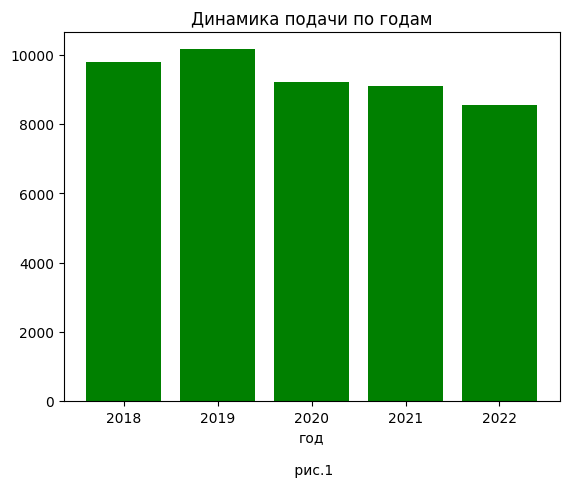

In [8]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  year_total.append(len(data_voc[year]['filing date']))
print('подача заявок по годам', '\n', pd.DataFrame(year_total, index=years, columns=['кол-во']))
plt.bar(years, year_total, color='g')
plt.title('Динамика подачи по годам')
plt.xlabel('год\n\n рис.1')
plt.show()
app_per_year = year_total

Мне стало интересно посмотреть динамику подачи не только по годам, но и по месяцам. Оказалось, что год от года наблюдается одна и та же картина: минимум в январе, волнообразный спад с марта по сентябрь и ударный рост с сентября по декабрь.
Предполагаю, что в коротком явнваре люди отдыхают и отходят от ударного завершения года, до мая набирают темп подачи, в празничном мае снова отдыхают, еще два месяца изобретают, после чего следует ежегодный августо-сентябрьский провал (возможно, он объясняется отпусками), ну а пик подачи от года к году в декабре. Исходя из моего опыта работы в бюджетных учерждениях, скорее всего, во многом это они выполняют годовые планы по подаче заявок.

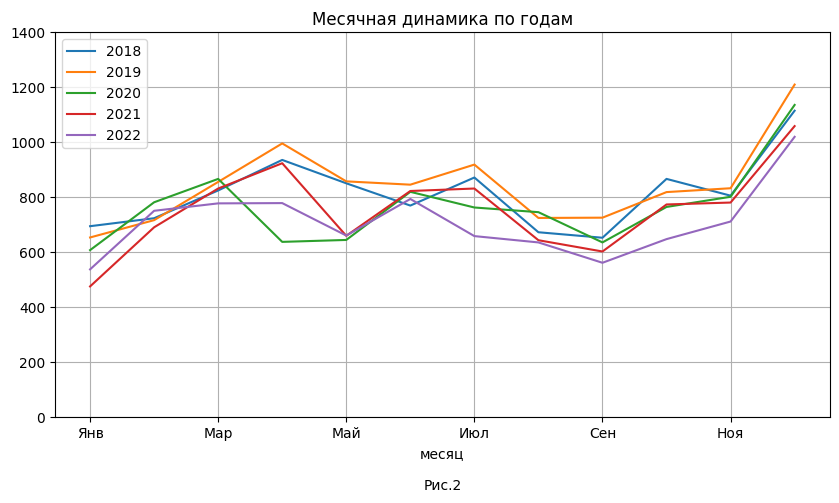

In [9]:

each_year_month_dynamic = []
for year in data_voc.keys():
  moth_dynamic = []
  filing_dates = []
  for filing_date in data_voc[year]['filing date']:
    if filing_date != 'no_data' and filing_date != '':
      filing_dates.append(int(filing_date.split('.')[1]))

  for month in range(1, 13):
    moth_dynamic.append(filing_dates.count(month))
  each_year_month_dynamic += [moth_dynamic]

months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
each_year_month_dynamic_df = pd.DataFrame(np.transpose(each_year_month_dynamic), columns=years)

each_year_month_dynamic_df['months'] = months_names
each_year_month_dynamic_df.plot(x='months', y = years, figsize=(10, 5), grid=True, yticks=[0, 200, 400, 600, 800, 1000, 1200, 1400], title='Месячная динамика по годам', xlabel='месяц\n\nРис.2')
plt.show()



Посмотрим сколько российских правообладателей в общем числе выданных патентов.
На рисунке 2 серый столбец показывает заявки, по которым нет данных, так как по ПМ публикуются только патенты, но не сами заявки, и только патенты содержат эти данные.
Доля зарубежных правообладателей ничтожно мала и за 5 лет уменьшилась в 4 раза (примерно с 400 до примерно 100).

<Axes: title={'center': 'Динамика подачи RU-(не RU) заявителями'}, xlabel='\nгод\n\nрис.3'>

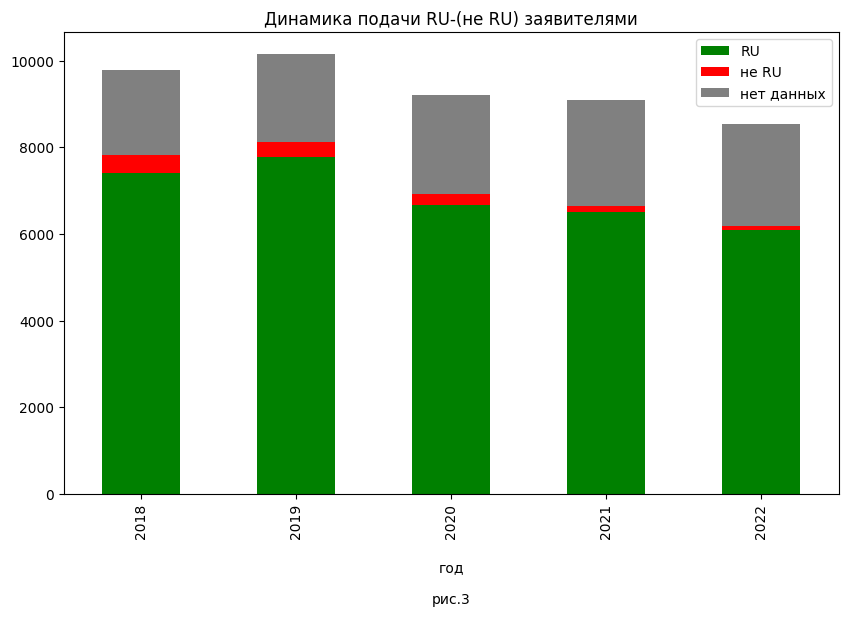

In [10]:
# количество RU и не RU заявителей

app_ru = []
app_not_ru = []
app_no_country = []
regex_country = r'(\([A-Z]{2}\))'

for df in data_voc.values():
  ru, not_ru, no_country = 0, 0, 0
  for app in df['applicant']:
    if 'RU' in app:
      ru += 1
    elif len(re.findall(regex_country, app)) != 0: # если нет двух заглавных букв в круглых скобках, то нет данных о стране заявителя
      not_ru += 1
    else:
      no_country += 1
  app_ru.append(ru)
  app_not_ru.append(not_ru)
  app_no_country.append(no_country)
applicants_df = pd.DataFrame(np.transpose([app_ru, app_not_ru, app_no_country]), columns=['RU', 'не RU', 'нет данных'])
applicants_df['год'] = years
applicants_df.plot(x='год', y = ['RU', 'не RU', 'нет данных'], kind='bar', stacked=True, title='Динамика подачи RU-(не RU) заявителями', color=['green', 'red', 'grey'], figsize=(10, 6), xlabel='\nгод\n\nрис.3', table=False)

In [11]:
applicants_df

RU  не RU  нет данных   год
0  7416    397        1974  2018
1  7768    352        2039  2019
2  6663    255        2290  2020
3  6504    150        2445  2021
4  6089     93        2356  2022

# Рассмотрим типы заявителей
Из рисунка видно, что лидерами по получению патентов являются юрлица и образовательные организации, далее с небольшим отставанием следуют физлица, доля госучреждений несоизмеримо меньше.
Из интересного:
1. Доля заявок по которым не был выдан патент на ПМ растет, пик приходится на 2021 год. С учетом того, что делопроизводство по ПМ достаточно быстрое, то данные могут быть неполными только для заявок второй половины 2022 года.
2. Хуже всех динамика получения патентов у физлиц.


In [12]:

def app_categories(column):
  '''
  column - column from dataframe for dividing into categories
  return vocabulary which comprise 4 categories and number of applicants in the categories
  '''

  applicants = column
  authors = app_df['authors']
  appl = []
  for ap, au in zip(applicants, authors):
    if ap != 'no_data':
      if ap in au:
        appl.append(ap)

  authors_0 = len(appl)
  #print('количество авторов одновременно и заявителей]:', authors_0)

  applicants = column # column
  print('total documents', len(applicants))
  authors = app_df['authors']
  edu = 0
  gov = 0
  leg = 0
  phys = 0
  no_data = 0
  appl = []
  app_edu = []
  app_gov = []
  app_leg = []
  app_phys = []

  for ap, au in zip(applicants, authors):
    if ap != 'no_data':
      if ap not in au:
        appl.append(ap)
    else:
      no_data += 1

  applicants = appl # новый список, в котором нет авторы = заявители
  #print('without authors-applicants', len(applicants))
  #print('no_data', (no_data))



  education = ['бразован', 'нститут', 'ниверс', 'ЮНИВЕРСИТИ', 'юниверсити', 'УНИВЕР', 'ИНСТИТЬЮТ', 'ИНСТИТУТ', 'ЮНИВЕРСИТЕ']
  government = ['осударственн', 'министерство', 'Российская Федерация', 'государственное бюджетное учреждение', 'ФГБНУ', 'ойсковая часть']
  legal = ['бщество', 'ЛТД.', 'ЛИМИТЕД', 'КОРПОРЕЙШН', 'ИНК.', 'Лимитед', 'ИНКОРПОРЕЙТЕД', 'ГМБХ', 'КОНИНКЛЕЙКЕ', 'ИНТЕРНЭШНЛ', 'ФРАНС', 'ЛЛС', 'КАЙСЯ', 'С.П.А', 'С.А.', 'ЛТД',
          ' АГ', 'СИМЕНС', 'КОМПАНИ', 'Лтд', 'КОРПОРЭЙШН', 'ЭЛЕКТРОНИКС', 'Компани', 'ОБЩЕСТВО', 'ЭлЭлСи', 'ХОЛДИНГ', 'БАСФ', 'ООО', 'ГмбХ', 'Инк.', 'А/С', 'АКЦИЕНГЕЗЕЛЛЬШАФТ',
          'АКЦИЕНГЕЗЕЛЬШАФТ', 'С.Р.Л.', ' АБ ', 'ЛЛК', 'Акциенгезельшафт', ' СПА ', 'СОЛЮШНС', 'ЗАО', 'ПАО', 'АКТИЕНГЕЗЕЛЛЬШАФТ', 'Текнолоджиз',
          'олюшн', 'ЭлЭЛСи', 'орпорейшн', 'ГРУП', 'ДиЭмСиСи', '(ПАБЛ)', 'ЭЛЕКТРИК', 'ТЕКНОЛО', 'АО ', 'БОЛАГЕТ', 'САФРАН', ' ОЙ ', 'ОЮЙ', 'ОЙЙ',
          ' САС ', ' СА ', ' АС ', 'СОЛЮШН', ' ИНК ', ' НВ ', 'АКТИЕБОЛАГ', 'ГОБЭН', 'ИНТЕРНЕЙШНЛ', 'ЛЛЦ', 'СЕРВИС', 'ФАРМА', 'ЭЛЭЛСИ']
  physic = [' оглы', 'анович ', 'СЕРГЕ', 'ВЛАДИМИР', 'ЕВИЧ ', 'ОВИЧ ', 'Чон-Ын']


  others = []
  for applicant in applicants[:]:
    trigger = 0
    #print('applicant', applicant)

    for e in education:
      if e in applicant:
        edu += 1
        #print('education')
        trigger = 1
        app_edu.append(applicant)
        break

    if not trigger:
      for g in government:
        if g in applicant:
          gov += 1
          #print('government')
          trigger = 1
          app_gov.append(applicant)
          break

    if not trigger:
      for l in legal:
        if l in applicant:
          leg += 1
          #print('legal')
          trigger = 1
          app_leg.append(applicant)
          break

    if not trigger:
      for p in physic:
        if p in applicant:
          phys += 1
          #print('physic', applicant)
          trigger = 1
          app_phys.append(applicant)
          break

    if not trigger:
      if (len(re.findall(r'\s', applicant.split(' (')[0]))) == 0 or len(re.findall(r'\.', applicant.split('(')[0])) > 0 or len(re.findall(r'\s', applicant.split(' (')[0])) > 3:
        #print()
        leg += 1
        app_leg.append(applicant)
        #print('legal')
        trigger = 1

      #print(applicant)
      if not trigger:
        # БОЛЬШАЯмаленькие пробел БОЛЬШАЯмаленькие пробел БОЛЬШАЯмаленькие
        name_pattern = r'[А-ЯЁ][а-яё]+ [А-ЯЁ][а-яё]+ [А-ЯЁ][а-яё]+'
        if len(re.findall(name_pattern, applicant)) != 0:
          phys += 1
          app_phys.append(applicant)
          #print('physic', applicant)
          trigger = 1

      if not trigger:
        # БОЛЬШАЯ ФАМИЛИЯ маленькое имя
        name_pattern = r'[А-ЯЁ]+ [А-ЯЁ][а-яё]+'
        if len(re.findall(name_pattern, applicant)) != 0:
          phys += 1
          #print('physic', applicant)
          app_phys.append(applicant)
          trigger = 1

    if trigger == 0:
      others.append(applicant)

    #print('\n')
  #print('no_data, edu, gov, leg, phys', no_data, edu, gov, leg + len(others), phys+authors_0)

  #print(len(others)) # почти 100%, что все others - это юрлица
  #print(others)
  #print('sum check', no_data + edu + gov + leg + phys + authors_0 + len(others))

  data = {}
  values = [no_data, edu, gov, leg + len(others), phys+authors_0]
  types = ['no_data', 'education', 'government', 'legal', 'individual']
  for value, key in zip(values, types):
    data[key] = value

  return values

total documents 9787
total documents 10159
total documents 9208
total documents 9099
total documents 8538


<Axes: xlabel='год\n\n рис.4'>

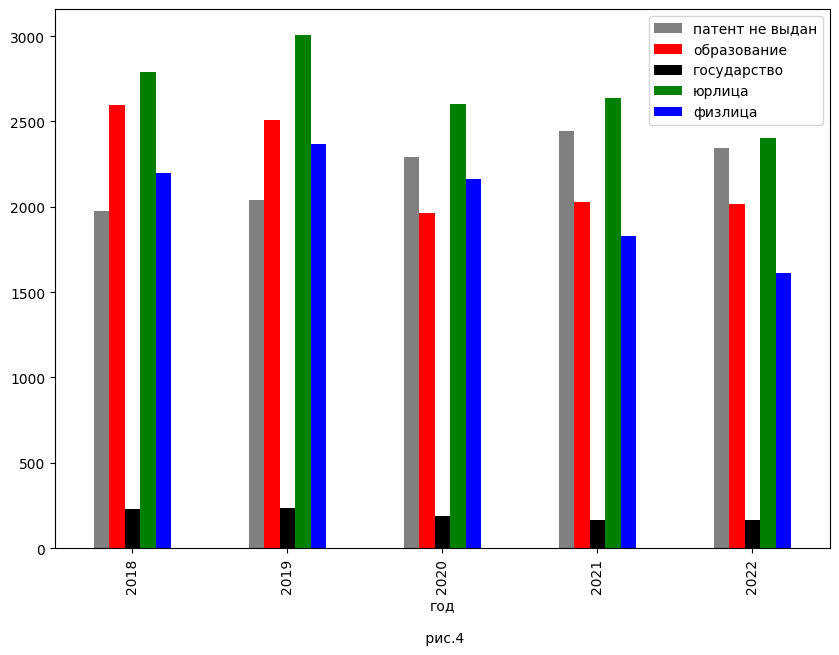

In [13]:
# правообладатели действующих патентов
types = ['no_patent', 'education', 'government', 'legal', 'individual']
types = ['патент не выдан', 'образование', 'государство', 'юрлица', 'физлица']
app_types_data = []
for app_df in data_voc.values():
  year_data = app_categories(app_df['applicant'])
  app_types_data.append(year_data)
app_types_df = pd.DataFrame(app_types_data, columns=types)
app_types_df['years'] = years
app_types_df.plot(x='years', y=types, kind='bar', figsize=(10, 7), xlabel='год\n\n рис.4', color = ['grey', 'red', 'black', 'green', 'blue'])


In [14]:
data_voc['2022'][data_voc['2022']['authors'].str.contains('Зыкин Евгений Сергеевич')]['applicant'].value_counts()

Федеральное государственное бюджетное образовательное учреждение высшего образования "Ульяновский государственный аграрный университет имени П.А. Столыпина" (RU)    182
Name: applicant, dtype: int64

# Давайте посмотрим наиболее активных авторов
Когда я решил посмотреть топы авторов по годам, то не ожидал, что это выльется в целое расследование, но оказалось, что группа российских "авторов" поставила создание интеллектуальной собственности на поток.

Итак, изучим топ 10 авторов за 2018 год, кого мы видим в первых рядах:
* Савушкин Роман Александрович    165
* Кякк Кирилл Вальтерович         144
* Орлова Анна Михайловна          104
* Шевченко Денис Владимирович      88
* Селявко Леонид Евгеньевич        60
* Курдюмов Владимир Иванович       59
* Зыкин Евгений Сергеевич          57
* Сутягин Сергей Алексеевич        35
* Бороненко Юрий Павлович          35
* Смирнов Алексей Сергеевич        32

Посмотрим, кому принадлежат патенты первых четверых авторов:     
1. РЕЙЛ 1520 АйПи ЛТД (CY) - около 100 патентов
2. Общество с ограниченной ответственностью "Всесоюзный научно-исследовательский центр транспортных технологий" (ООО "ВНИЦТТ") - около 50 патентов

Авторы россияне, права принадлежат кипрской компании, патентов больше ста только за 2018 год, уже интересно.
А, может, гугл знает, кто эти люди. Конечно знает. Успешных людей гугл знает.
Савушкин Роман Александрович - генеральный директор Научно-производственной корпорации «Объединенная Вагонная Компания» (ОВК) с 2012 до 2018 года (согласно статье с его интервью).
С 2011 - Гендиректор лизинговой компании Rail1520 (вошла в ОВК).
С 2003 - Технический директор "Объединения вагоностроителей" и "Инженерного центра вагоностроения" (ему на тот момент 26 лет)
В общем, где всякие объединения, там Савушкин, можно сделать вывод, что он очень успешный управленец.

Ладно, смотрим дальше.
Кто такой Кякк Кирилл Вальтерович? С основания и до 2018 года генеральный директор ООО «Всесоюзный научно-исследовательский центр транспортных технологий» (ВНИЦТТ). ВНИЦТТ — проектный центр ОВК.
Кто такая Орлова Анна Михайловна? С 2018 года генеральный директор ООО «ВНИЦТТ».
Кто такой Шевченко Денис Владимирович? Генеральный директор ООО "ТИХВИНСКИЙ ИСПЫТАТЕЛЬНЫЙ ЦЕНТР ЖЕЛЕЗНОДОРОЖНОЙ ТЕХНИКИ" (железнодорожный холдинг), учредитель этого холдинга - ОВК.

Что нам говорит Википедия: «Объединенная вагонная компания» (ОВК) была учреждена для управления деятельностью Тихвинского вагоностроительного завода (ТВСЗ) и лизинговой компании «РЕЙЛ1520» (RAIL1520) в мае 2012 года.

Итак, что мы имеем российские граждане, работающие топ-менеджерами в связанных железнодорожных компаниях, являются авторами патентов кипрской компании (все патенты касаются железнодорожного транспорта).
Во-первых, они, конечно, не могут быть авторами всех этих патентов, потому что генеральные директора не придумывают по 100 патентов в год. Во-вторых, они лишили авторства настоящих разработчиков. В-третьих, они получили исключительные права на, по факту, разработанные в России решения, для кипрской компании, что должен отслеживать Роспатент.

Можно представить, конечно, что эти четверо во время отпуска сидели вечером в баре на Кипре, обсуждали, как можно улучшить ж/д транспорт, и пришла им в голову гениальная мысль: а давайте создадим кипрский офшор и на него зарегистрируем всю интеллектуальную собственность, которую мы своими светлыми головами сейчас понапридумывали (около 100 идей).
Но есть и еще один (менее вероятный, конечно) вариант: инженеры придумали технические решения, а их наработки записали на себя топ-менеджеры, которые нашли хитровыдуманный способ монетизировать свою исключительную талантливость.

Едем дальше. Посмотрим, какова судьба этих патентов. По большей части эти патенты действуют, то есть за них исправно платят ежегодные пошлины.
Все 100 с лишним патентов я не посмотрел, рандомно пооткрывал десяток, у всех открытых одна история: права от кипрской компании "РЕЙЛ 1520 АйПи ЛТД" в полном объеме переданы российской компании "РЕЙЛ1520 АЙ ПИ" в апреле 2023 года, очевидно, что переданы они на возмездной основе, так как по закону договор отчуждения между юрлицами не может быть безвозмездным. Сумму договора не узнать, но, думаю, что каждый может представить количество нулей в числе и умножить это число на 100 патентов.
Далее "РЕЙЛ1520 АЙ ПИ" оформляет договор залога на свои приобретенные патенты, залогодержателем становится "Публичное акционерное общество Национальный банк "ТРАСТ"".

Если коротко, то схема такая. Регистрируем российский патент на знаменитую железнодорожную кипрскую компанию (сарказм), продаем патент российской компании с почти таким же названием (чтобы не заморачиваться). Получаем доллары на счет кипрского банка от российской компании.
Закладываем свежекупленный патент в российский банк и получаем рубли на счет в Российском банке.

Делать бизнес - это все-таки талант. Маск, учись!

Наверное, на этом моменте читатель уже забыл, что эта статья - не расследование серых схем обогащения на интеллектуальной собственности, а анализ патентнов.
Вернемся к топ-авторам патентов за 2018 год, следующая шестерка представлена ниже:
* Селявко Леонид Евгеньевич        60
* Курдюмов Владимир Иванович       59
* Зыкин Евгений Сергеевич          57
* Сутягин Сергей Алексеевич        35
* Бороненко Юрий Павлович          35
* Смирнов Алексей Сергеевич        32



Селявко Леонид Евгеньевич - ученый, кандидат психологических наук, судя по всему действительно, сам получил 60 патентов. Это очень высокая продуктивность, но только 9 из патентов за его авторством действуют на сегодняшний момент. Причем необычно, что он сам является патентообладателем большинства патентов, а не вуз, в котором он работает.
Ниже показано облако слов из названий его патентов.

In [15]:
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(15, 10))
    # Показать изображение
    plt.imshow(wordcloud)
    # Без подписей на осях
    plt.axis("off")

In [16]:
# функция сбора массива с названиями патентов автора

def author_titles_check(author_name):
  author_titles = ''
  print(author_name)
  author_patents = data_voc['2018'][data_voc['2018']['authors'].str.contains(author_name)]['claims'].tolist()
  #print(author_patents)
  for title in author_patents:
    #print(title.split(',')[0].replace('1. ',''))
    author_titles += title.split(',')[0].replace('1. ','').replace('\n', '') + ' '

  return author_titles.lower()

Селявко Леонид Евгеньевич
магнитный тренажер для занятий по восстановлению пространственной памяти у больных неврологической клиники методом запоминания пространственной ориентации фигур магнитный тренажер для занятий по восстановлению пространственной памяти у больных неврологической клиники методом запоминания элементов таблицы трубочный тренажер для занятий по восстановлению движений пальцев и кисти руки магнитный тренажер для занятий по восстановлению пространственной памяти у больных неврологической клиники методом запоминания направлений магнитный куб-тренажер для занятий по восстановлению зрительно-пространственного восприятия и памяти у больных неврологической клиники игровая панель-тренажер для групповых занятий по восстановлению мелкой моторики и интеллектуальной деятельности у больных неврологической клиники универсальная игровая панель для групповых занятий по восстановлению мелкой моторики магнитный куб-тренажер для занятий по восстановлению пространственного восприятия и 

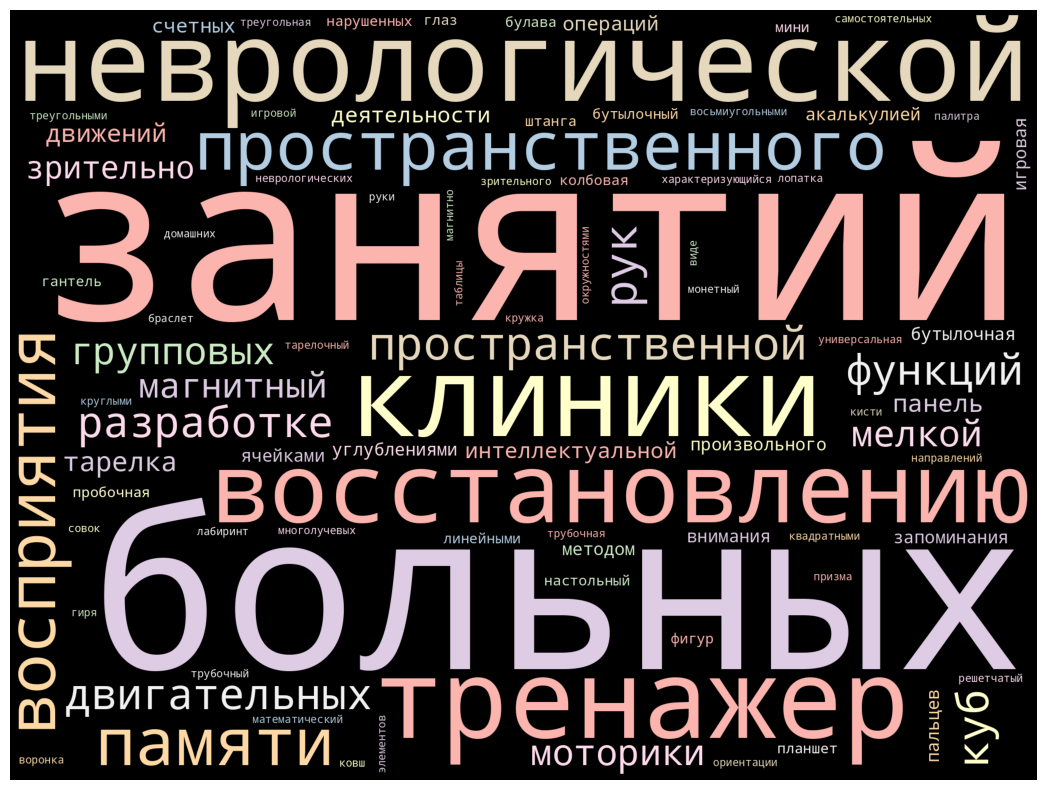

In [17]:
author_name = 'Селявко Леонид Евгеньевич'
STOPWORDS_RU = get_stop_words('russian')
text = author_titles_check(author_name)
print(text)
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)
plot_cloud(wordcloud)

Курдюмов Владимир Иванович, Зыкин Евгений Сергеевич, Сутягин Сергей Алексеевич, Смирнов Алексей Сергеевич - представители профессорско-преподавательского состава, патенты принадлежат вузам, в которых они работали, но все они не действуют.



Отдельно следует выделить Бороненко Юрия Павловича, патенты под его авторством принадлежат Акционерному обществу "Научно-внедренческий центр "Вагоны" (АО "НВЦ "Вагоны"). Это коммерческое предприятие, а он его основатель. Почти все патенты действуют.
Вполне могу поверить, что 35 патентов на ПМ были получены с его творческим вкладом. Во-первых, он основатель НВЦ "Вагоны", во-вторых, он профессионал в этой области, в-третьих, он не выглядит, как "успешный" бизнесмен, а выглядит, как представитель творческой интеллигенции. Понятно, что субъективно, но вот фильм о нем: https://www.youtube.com/watch?app=desktop&v=7JPKBhPU7Wg

А ниже облако из названий патентов с его авторством.


Бороненко Юрий Павлович
рама кузова грузового вагона шкворневой узел грузового вагона вагон-хоппер климатическая камера трехэлементная тележка грузового вагона тормозная колодка железнодорожного транспортного средства фрикционный клин тележка грузового вагона вагон-хоппер тормозная система тележки грузового вагона система электрообеспечения мониторинговой аппаратуры (1) железнодорожного вагона система электрообеспечения контрольной аппаратуры (1) железнодорожного вагона планка фрикционная гасителя колебаний тележки грузового вагона цилиндрический скользун постоянного контакта железнодорожная цистерна тормозная колодка железнодорожного транспортного средства вагон-цистерна с котлом из алюминиевого сплава рама кузова полувагона регулятор тормозной рычажной передачи железнодорожного транспортного средства распорка триангеля рама боковая с бонкой сложной формы вагон-цистерна устройство для крепления привода стояночного тормоза железнодорожного транспортного средства рама вагона сочленённог

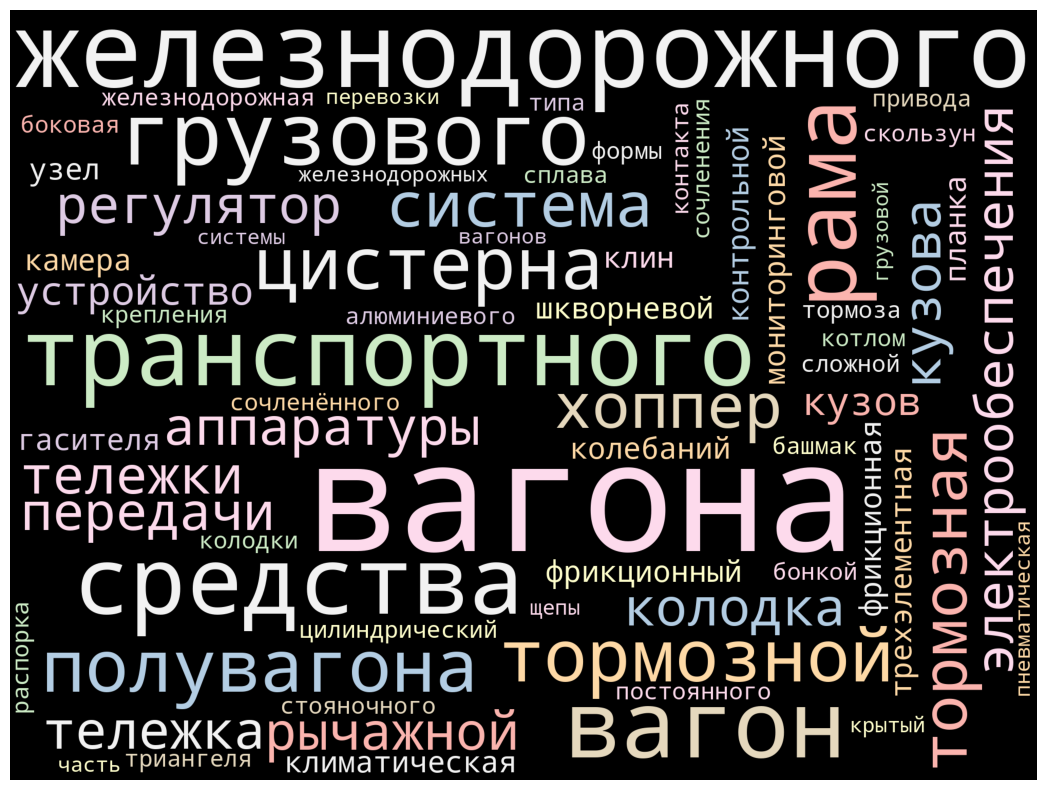

In [18]:
author_name = 'Бороненко Юрий Павлович'
STOPWORDS_RU = get_stop_words('russian')
text = author_titles_check(author_name)
print(text)
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)
plot_cloud(wordcloud)

In [ ]:
# проверка действуют ли патенты автора
def author_status_check(author_name, year):
  author_status = []
  print(author_name)
  author_patents = data_voc[year][data_voc[year]['authors'].str.contains(author_name)]['status'].tolist()
  for status in author_patents:
    author_status.append(status.split('(')[0])
  author_status_df = pd.DataFrame(author_status)
  print(author_status_df.value_counts())

# топ авторов
for app_df, year in zip(data_voc.values(), years):
  print('====================', year, '====================')
  all = []
  authors_column = app_df['authors']
  authors_column = authors_column
  for author in authors_column[:]:
    regex = r' \(\w\w\)'
    separated = re.split(regex, author)[:-1]
    for s in separated:
      all.append(s.replace(',', '').replace(';', ''))

  all_authors_df = pd.DataFrame(all)
  top_10_authors = all_authors_df.value_counts()[:10]
  print(top_10_authors)
  for author_name in top_10_authors.index:
    print('\n'+str(author_name[0]))
    print(data_voc[year][data_voc[year]['authors'].str.contains(author_name[0])]['applicant'].value_counts())
    author_status_check(author_name[0], year)


Давайте коротко пробежимся по топ авторов следующих годов
#2019
Савушкин Роман Александрович        114
Орлова Анна Михайловна              108
Шевченко Денис Владимирович          83
Селявко Леонид Евгеньевич            73
Зыкин Евгений Сергеевич              61
Кякк Кирилл Вальтерович              59
Курдюмов Владимир Иванович           45
Рыкин Дмитрий Владимирович           41
Голованчиков Александр Борисович     38
Соколов Алексей Михайлович           33

Опять Савушкин, Орлова, Шевченко. А вот Кякк почему-то мало в этом году придумывал идей для патентов - в два раза меньше чем Савушкин.

Господин Селявко продолжает ударно трудиться над созданием заявок и получил уж 73 патента - на 13 больше чем годом ранее. Все также большая часть патентов принадлежит ему, а не вузу.

Зыкин и Курдюмов все еще в топе авторов, оно и понятно, патентование в вузах вознаграждается, хочешь премию, будь добр - подай заявку.

Рыкина Дмитрия Владимировича гугл не знает, но он в соавторах с Зыкиным и Курдюмовым, причем указан всегда последним, наверное, молодой преподаватель или аспирант.

Голованчиков Александр Борисович - профессор ВолгГТУ, похоже, руководитель множества аспирантов, поэтому правомерно оказывался в авторах многих патентов.

Соколов Алексей Михайлович в компании с Савушкиным и прочими. Судя по цифрам доля Кякка перекочевала к нему. Видимо, они с Кякком занимались какой-то подготовкой материалов для подачи заявок. Заявки поданы через патентных поверенных, конечно же, но какие-то материалы предоставлять поверенным все-таки надо.

# 2020
Зыкин Евгений Сергеевич             94
Селявко Леонид Евгеньевич           77
Исайчев Виталий Александрович       62
Сергеев Артём Юрьевич               50
Мишта Валерий Павлович              45
Голованчиков Александр Борисович    39
Рыкин Дмитрий Владимирович          37
Лямзин Евгений Николаевич           34
Коптяев Евгений Николаевич          32
Лаптева Наталья Алексеевна          31

Пропали Савушкин и компания, наверное, решили, что 200 патентов им на всю жизнь хватит и перестали этим заниматься.
Но в топе с прошлого года остались Зыкин, Селявко, Голованчиков, Рыкин.
Посмотрим на новые лица.
* Исайчев Виталий Александрович - ректор ФГБОУ ВО Ульяновский ГАУ, вот уж ректор точно 62 идеи для патента придумал. Он второй автор в патентах Зыкина (профессора того же вуза).
* Сергеев Артём Юрьевич - старший преподаватель, Военный университет МО РФ. Тут надо отметить, что они чуть ли не всю кафедру вписывают в авторы, в одном патенте у них 21 автор. Понятно, почему за его авторством 50 патентов.
* Мишта Валерий Павлович - ктн, доцент в ВогГТУ, в 36-ти патентах он единственный автор, поэтому мало сомнений, что он настоящий автор. Конечно, 36 заявок можно подать только при хорошей работе патентного отдела вуза, самостоятельно писать 3 заявки в месяц невозможно, имея преподавательскую загрузку.
* Лямзин из компании с Сергеевым, где под 20 авторов у каждого патента
* Лаптева Наталья Алексеевна - ведущий инженер-патентовед в Брянском государственном аграрном университете. Конечно же, патентовед не может себя вписывать в авторы, если не внес творческого вклада в создание изобретения.

# 2021
Зыкин Евгений Сергеевич          152
Кудряшова Ирина Владимировна     104
Гаврилова Василиса Львовна       103
Шевченко Денис Владимирович       90
Исайчев Виталий Александрович     78
Кузнецов Владимир Васильевич      71
Лаптева Наталья Алексеевна        68
Купреенко Алексей Иванович        58
Селявко Леонид Евгеньевич         56
Исаев Хафиз Мубариз-оглы          55

Дальше я буду описывать авторов очень коротко. Зыкин, Исайчев, Лаптева, Селявко - знакомые фигуры. Кудряшова Ирина Владимировна из компании авторов с Зыкиным, подозреваю, что тоже может оказаться вузовским патентоведом.
Неожиданно снова появился Шевченко, это который связан с кипрской компанией, но теперь все патенты с его авторством принадлежат российским компаниям.
Савушкина уволили, Орлова все еще гендир ВНИЦТТ, про Кякка гугл ничего не знает. Схематозить компания "авторов" перестала, хотя в авторы себя записывать Шевченко не забывает.
Кузнецов, Купреенко и Исаев - преподаватели в Брянском государственном аграрном университете, в большинстве патентов они в соавторах.

# 2022
Зыкин Евгений Сергеевич             182
Казанчев Андрей Федорович            88
Лаптева Наталья Алексеевна           79
Кузнецов Владимир Васильевич         74
Исаев Хафиз Мубариз-оглы             59
Лазуткина Светлана Александровна     59
Жаркова Полина Александровна         58
Исаев Самир Хафизович                58
Купреенко Алексей Иванович           53
Исайчев Виталий Александрович        50

Зыкин в ударе - 182 патента в год! Идею каждые два дня человек придумывает, совмещая эту удраную деятельность с работой директором Технологического института-филиала ФГБОУ ВО Ульяновский ГАУ.
Пробежимся по новым лицам.
Казанчев Андрей Федорович в соавторах с Зыкиным, видимо, стал аспирантом, потому что в 2018-2021 годах, патентов у него не было, а в 2022 сразу 88.
Вот что значит попасть в правильное место! Можно поизучать их патенты, чтобы разобраться, как аспирант становится автором 88 заявок, но и так понятно, что это просто конвейр для выполнения вузовского плана по получению патентов и получению премий за них.
Лазуткина и Жаркова одни из соавторов вместе с Зыкиным.
Исаев Самир Хафизович, понятно, сын Исаева Хафиз Мубариз-оглы

# На этом с анализом авторов закончу, посмотрим, что интересного можно найти у правообладателей

общее количество 9787
общее количество 10159
общее количество 9208
общее количество 9099
общее количество 8538
   действует  не действует  может прекратить свое действие  \
0   0.353326      0.213855                        0.053643   
1   0.394133      0.090068                        0.055025   
2   0.407255      0.006625                        0.066030   
3   0.451588      0.005605                        0.111661   
4   0.501523      0.001405                        0.218904   

   может быть восстановлен   no_data years  
0                 0.177480  0.201696  2018  
1                 0.260065  0.200709  2019  
2                 0.271394  0.248697  2020  
3                 0.162435  0.268711  2021  
4                 0.002225  0.275943  2022  


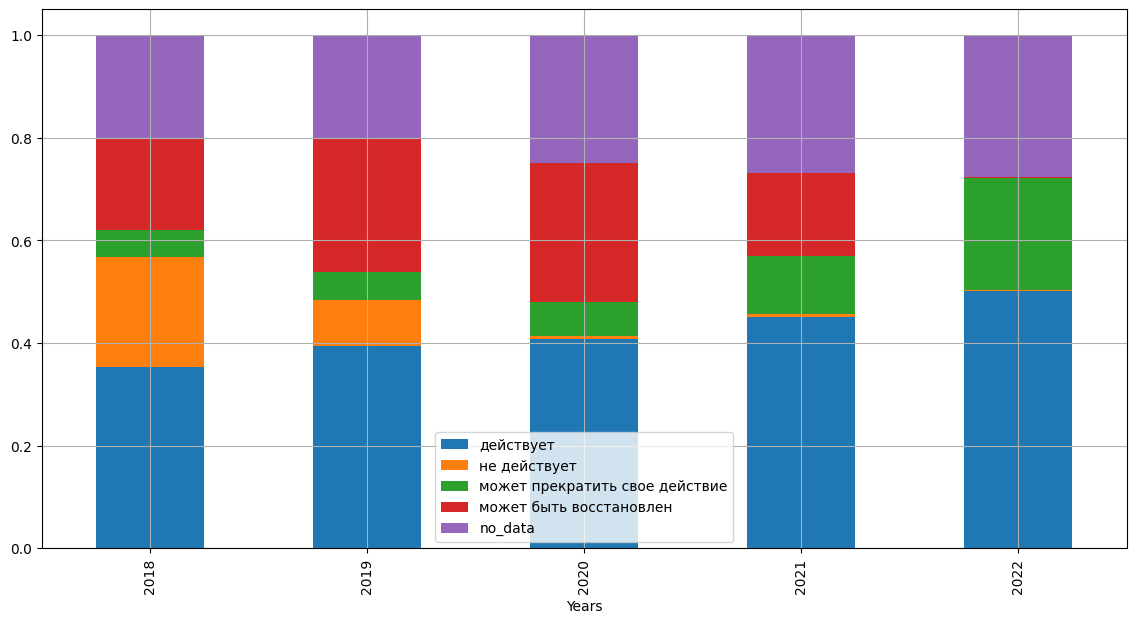

In [20]:
app_status = []
all_data = pd.Series([0, 0, 0 , 0, 0])
for year in years:
  status_active = 0
  status_not_active = 0
  status_can_be_active = 0
  status_can_be_not_active = 0
  status_no_data = 0

  all_app_status = data_voc[year]['status'].tolist()
  print('общее количество', len(all_app_status))
  for status in all_app_status[:]:
    #print(status)
    if status.split('(')[0].strip() == 'действует':
      status_active += 1
    elif status.split('(')[0].strip() == 'не действует':
      status_not_active += 1
    elif status.split('(')[0].strip() == 'может прекратить свое действие':
      status_can_be_not_active += 1
    elif status.split('(')[0].strip() == 'прекратил действие, но может быть восстановлен':
      status_can_be_active += 1
    else:
      status_no_data += 1
  app_status.append([status_active/len(all_app_status), status_not_active/len(all_app_status), status_can_be_not_active/len(all_app_status), status_can_be_active/len(all_app_status), status_no_data/len(all_app_status)])

app_status_df = pd.DataFrame(app_status, columns = ['действует', 'не действует', 'может прекратить свое действие', 'может быть восстановлен', 'no_data'])
app_status_df['years'] = years
print(app_status_df)
app_status_df.plot(x='years', y=['действует', 'не действует', 'может прекратить свое действие', 'может быть восстановлен', 'no_data'], kind='bar', figsize=(14, 7), xlabel='Years', stacked=True, grid=True)


all_data.dropna(inplace=True)
#print(all_data)

==================== 2018 ====================
Федеральное государственное бюджетное образовательное учреждение высшего образования "Ульяновский государственный аграрный университет имени П.А. Столыпина" (RU)                             116
РЕЙЛ 1520 АйПи ЛТД (CY)                                                                                                                                                                       105
Федеральное государственное бюджетное образовательное учреждение высшего образования "Волгоградский государственный технический университет" (ВолгГТУ) (RU)                                    89
Публичное акционерное общество "КАМАЗ" (RU)                                                                                                                                                    56
Общество с ограниченной ответственностью "Всесоюзный научно-исследовательский центр транспортных технологий" (ООО "ВНИЦТТ") (RU)                                                 

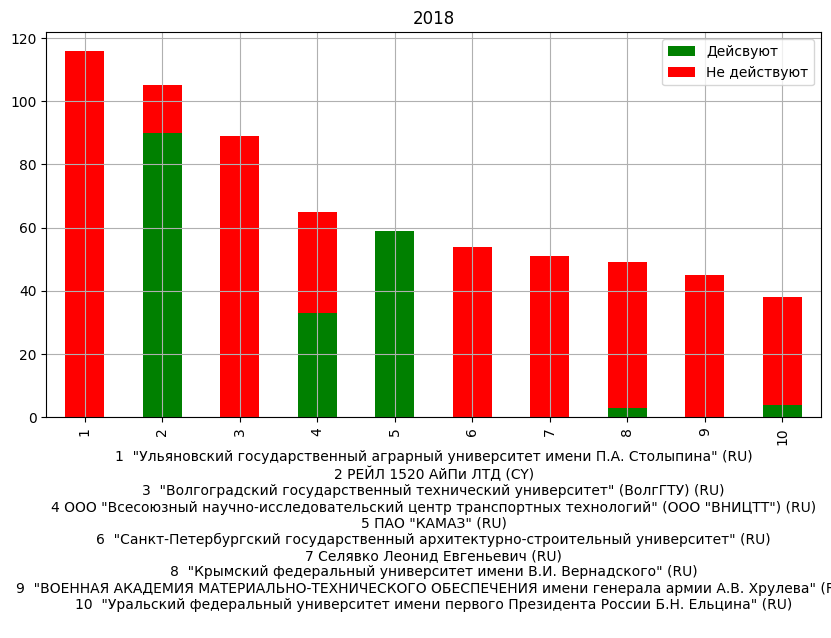

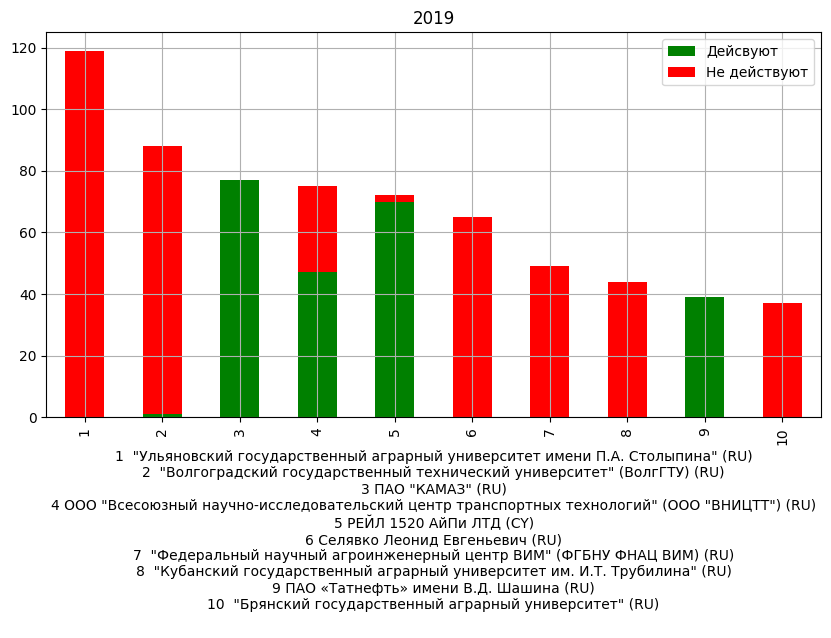

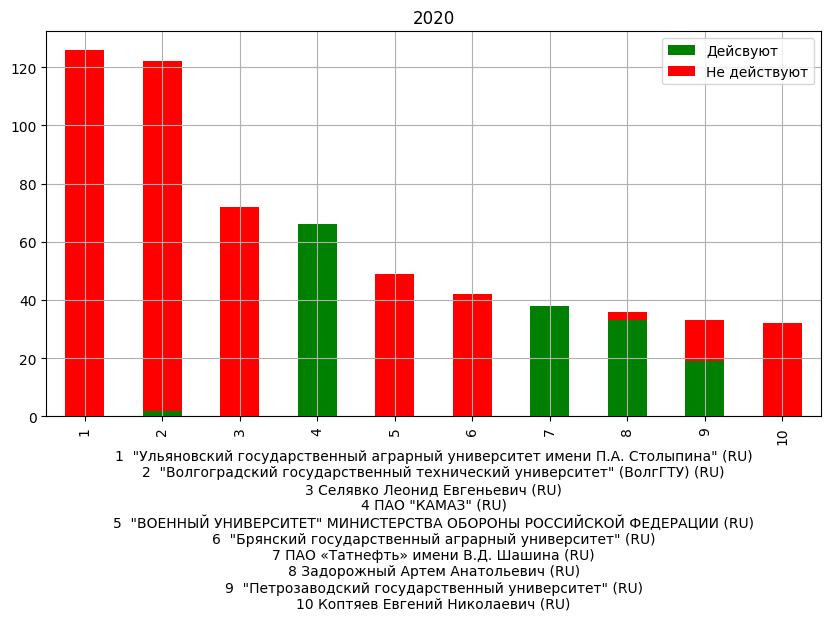

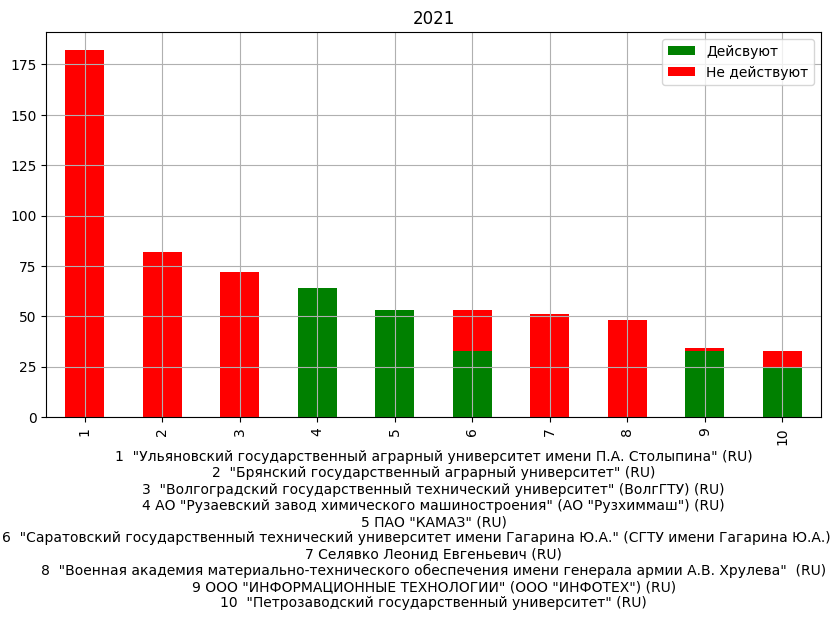

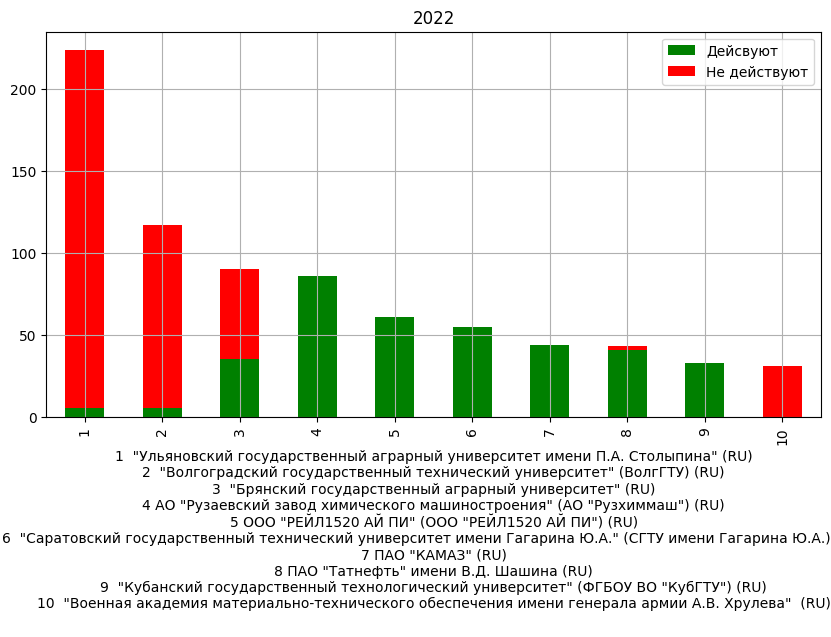

In [21]:
# проверка действуют ли патенты заявителя
def app_status_check(data_voc, app_name, year):
  applicant = ''
  original_app_name = app_name
  app_name = app_name.split('(')[0]
  app_patents = data_voc[year][data_voc[year]['applicant'].str.contains(app_name)]['status'].tolist()
  app_status_active = 0
  app_status_total = 0
  for status in app_patents:
    app_status_total += 1
    if status.split('(')[0].strip() == 'действует':
      app_status_active += 1
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Публичное акционерное общество', 'ПАО')
    original_app_name = original_app_name.replace('Общество с ограниченной ответственностью', 'ООО')
    original_app_name = original_app_name.replace('Федеральное государственное автономное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное автономное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное казенное военное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное автономное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное казенное военное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное научное учреждение', '')
    original_app_name = original_app_name.replace('ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ КАЗЕННОЕ ВОЕННОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ', '')
    original_app_name = original_app_name.replace('Федеральное государственное казенное военное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Министерства обороны Российской Федерации', '')
    original_app_name = original_app_name.replace('ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ', 'ООО')
    original_app_name = original_app_name.replace('Акционерное общество', 'АО')

  app_status_info = [original_app_name, app_status_total, app_status_total-app_status_active, app_status_active]
  return app_status_info

# топ заявителей
for app_df, year in zip(data_voc.values(), years):
  print('====================', year, '====================')
  all = []
  app_column = app_df['applicant']
  top_10_app = app_column.value_counts()[1:11]
  print(top_10_app, '\n')
  applicant_visualisation = []
  counter = [i for i in range(1, 11)]
  for app_name in (top_10_app.index):
    app_status_results = app_status_check(data_voc, app_name, year)
    applicant_visualisation.append(app_status_results)
  applicant_visualisation_df = pd.DataFrame(applicant_visualisation, columns=['Патентообладатель', 'Всего', 'Не действуют', 'Дейсвуют']).sort_values(by='Всего', ascending=False)
  applicant_visualisation_df['№'] = counter
  x_visual = ''
  for num, app in zip(applicant_visualisation_df['№'], applicant_visualisation_df['Патентообладатель']):
    x_visual += (str(num) + ' ' + app + '\n')

  applicant_visualisation_df.plot(x='№', y=[ 'Дейсвуют', 'Не действуют'], kind='bar', figsize=(10, 5), xlabel=x_visual, stacked=True, grid=True, title = year, color=['green', 'red'])


Что мы видим. Патенты поддерживают в силе в основном только коммерческие организации. Вузы, которые являются лидерами по подаче, патенты за поддержание патентов в силе не платят, потому что они им не нужны.
Исключение - это последние года, потому что пошлину за поддержание в силе за первый год все платят.
Камаз стабильно в десятке лидеров и поддерживает свои патенты, посмотрим, что он защищает.

In [22]:
a = ['f', 'g']
a.append('k')
a

['f', 'g', 'k']

In [24]:
# функция сбора массива с названиями патентов заявителя

def applicant_titles_check(applicant_name):
  applicant_titles = ''
  print(applicant_name)
  applicant_patents = app_df[app_df['applicant'].str.contains(applicant_name)]['claims'].tolist()
  #print(author_patents)
  for title in applicant_patents:
    #print(title.split(',')[0].replace('1. ',''))
    applicant_titles += title.split(',')[0].replace('1. ','').replace('\n', '') + ' '

  return applicant_titles.lower()

КАМАЗ
кондуктор двухпозиционный для сверления отверстий передняя управляемая ось транспортного средства мехатронный мост электротранспортного средства кузов карьерного самосвала с обогревом транспортное средство с двухпоточной трансмиссией прихват передвижной автобус повышенной проходимости устройство для измерения интенсивности дробенаклепа на поверхности металлоизделий четырехосное автомобильное шасси защитный кожух моторного отсека рамка радиатора универсальный единый модуль энергоустановки на водородных топливных элементах устройство крепления осевого инструмента с коррекцией положения оси каркас кабины транспортного средства разжимное самоцентрирующее устройство трехосное автомобильное шасси повышенной проходимости с колесной формулой 6×6 балансирная рессорная подвеска транспортного средства поперечина рамы транспортного средства стенд проверки на герметичность полых сварных изделий каркас кабины трактора каркас кабины землевоза пассажирское транспортное средство с перезаряжаемой 

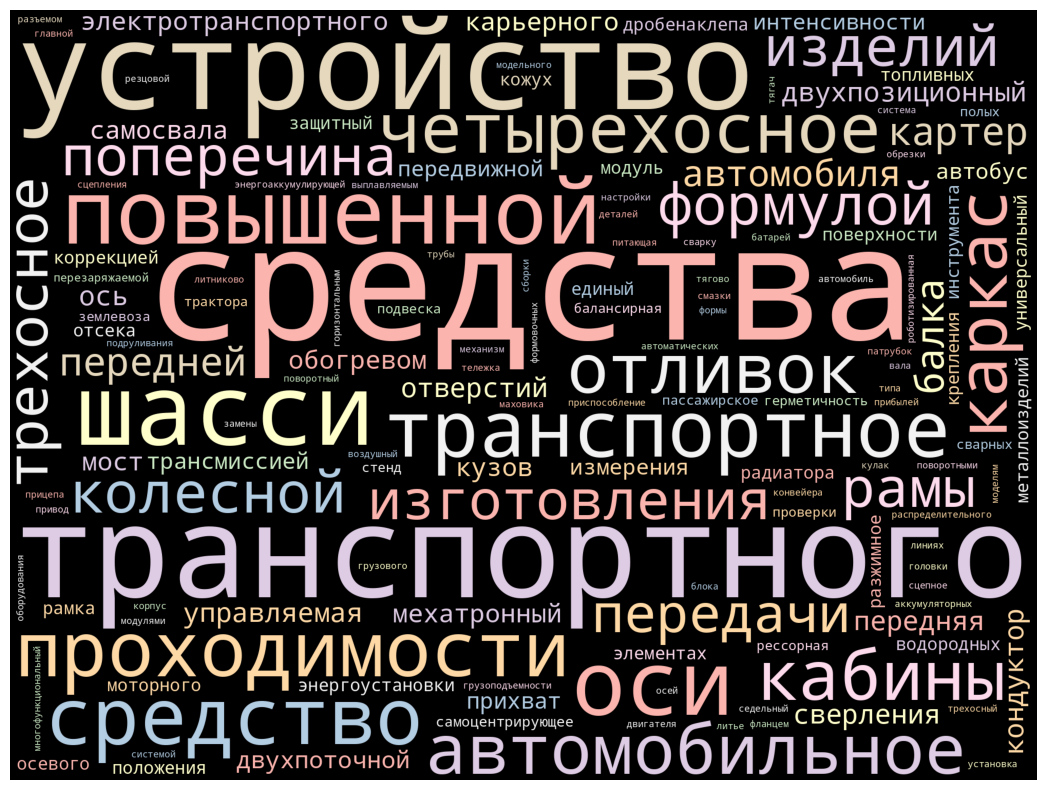

In [25]:
# облако названий патентов Камаза

applicant_name = 'КАМАЗ'
STOPWORDS_RU = get_stop_words('russian')
text = applicant_titles_check(applicant_name)
print(text)
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)
plot_cloud(wordcloud)

В последние два года как-то очень активно начал патентовать "Рузхиммаш", посмотрим, что он защищает.


Рузхиммаш
вагон-хоппер люк-лаз резервуара вертикальный теплообменный аппарат боковая рама тележки грузового вагона тележка грузового вагона балансир трехосной тележки вагона железнодорожный вагон для транспортировки стекла вагон-самосвал устройство для крепления груза на транспортном средстве устройство фиксации штока цилиндра двухосная тележка для скоростного грузового вагона изотермический контейнер изотермический корпус грузового контейнера устройство для контроля взаимного расположения угловых фитингов контейнера устройство для замера плоскостности поверхности устройство для контроля перехода рычагов крышек люков механизма разгрузки вагона-хоппера через «мертвую точку» изотермический контейнер литая боковая рама тележки грузового вагона изотермический контейнер корпус рефрижераторного грузового контейнера изотермический корпус грузового контейнера вагон-цистерна устройство теплообменное наружное вертикальных сосудов и аппаратов двухосная тележка для скоростного грузового вагона дву

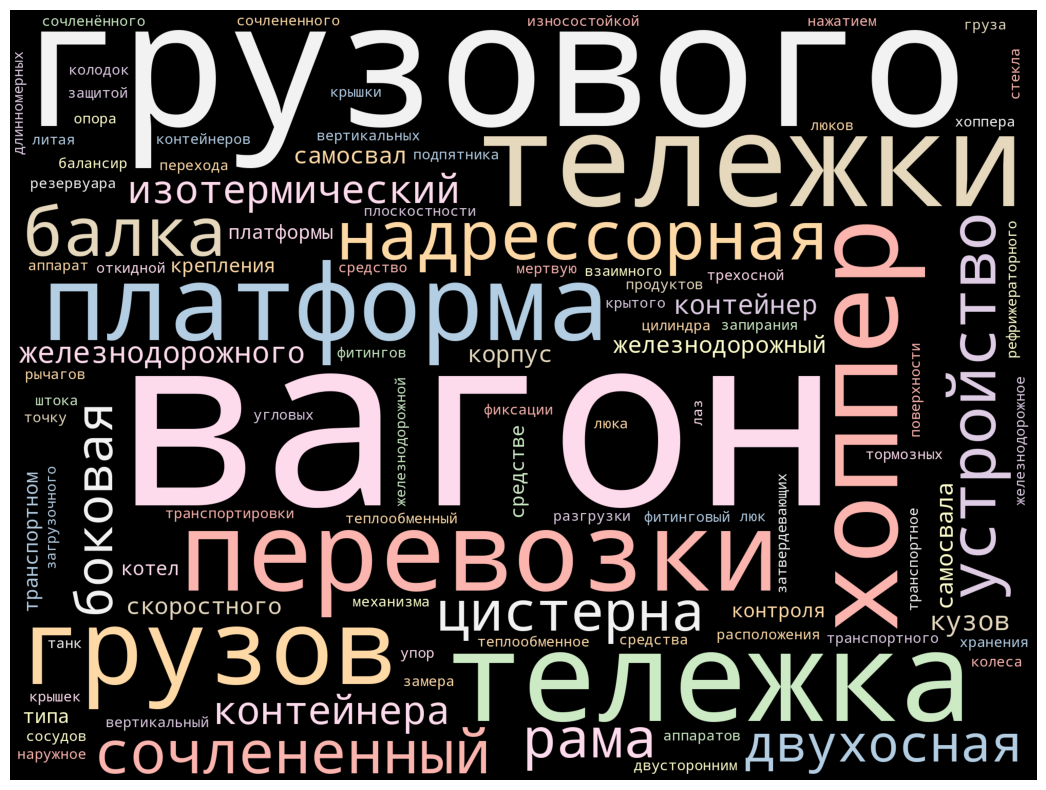

In [26]:
# облако слов названий патентов Рузхиммаша
applicant_name = 'Рузхиммаш'
STOPWORDS_RU = get_stop_words('russian')
text = applicant_titles_check(applicant_name)
print(text)
text = text.replace('вагона', 'вагон')
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)
plot_cloud(wordcloud)

Вопреки названию Рузхиммаш - крупнейший российский производитель грузового подвижного состава, и патенты его относятся к этой теме, конечно.
Посмотрим, что у этой компании с авторами.

In [27]:
applicant_authors = app_df[app_df['applicant'].str.contains('Рузхиммаш')]['authors'].to_list()
all_authors = (','.join(applicant_authors).split(','))
print(pd.DataFrame(all_authors).value_counts()[:5])


Григорьев Алексей Владимирович (RU)     36
Шмыгин Алексей Александрович (RU)       24
Ставский Андрей Леонидович (RU)         24
Маненков Александр Владимирович (RU)    22
Лавров Вячеслав Александрович (RU)      21
dtype: int64


Среди топ-5 авторов четверо первых технические специалисты. Про Лаврова гугл ничего не знает, что говорит о том, что он, скорее всего, тоже инженер.
Это грамотный подход к организации патентной деятельности, настоящие авторы должны быть указаны в патенте, хочется верить, что они также получают авторские вознаграждения за свой интеллектуальный труд.

Вернемся к первончальной задаче, посмотрим динамику отказов в выдаче патентов и динамику заявок, которые оказались отозванными (то есть их забросил заявитель).



[12.996832532951874, 11.684220887882665, 15.29105125977411, 14.968677876689746, 9.358163504333568]


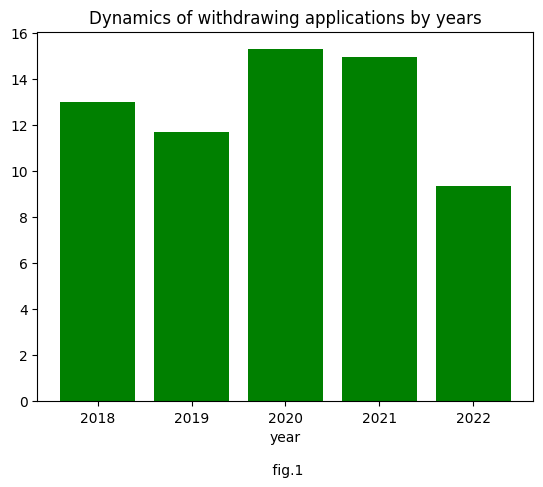

In [28]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['withdrawal date'] != 'no_data'])/total)
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of withdrawing applications by years')
plt.xlabel('year\n\n fig.1')
plt.show()

[6.723204250536425, 7.392459887784231, 8.525195482189401, 9.440597867897571, 5.727336612789881]


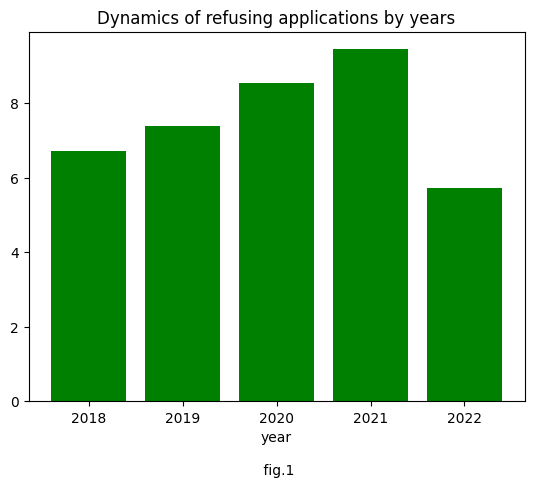

In [29]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['refuse date'] != 'no_data'])/total)

print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of refusing applications by years')
plt.xlabel('year\n\n fig.1')
plt.show()



[80.6784510064371, 80.58864061423368, 75.57558644656821, 72.74425761072646, 74.08058093230265]


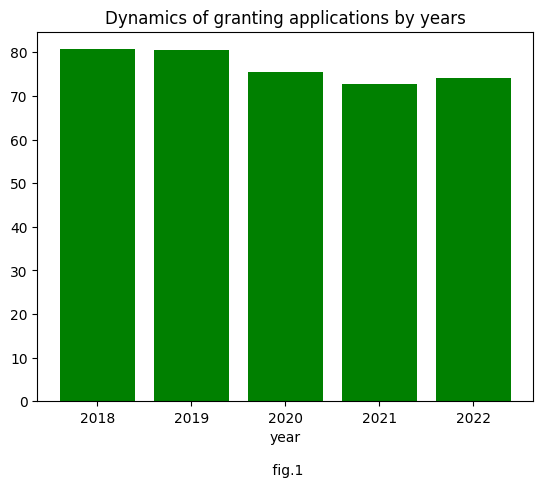

In [30]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['grant date'] != 'no_data'])/total)
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of granting applications by years')
plt.xlabel('year\n\n fig.1')
plt.show()

Посмотрим как часто не выдают патенты год от года
Как видно из рисунка в 20,21 годах произошел резкий рост количества заявок, по которым по разным причинам не выдан патент.
Посмотрим на какие решения не выдавали патенты больше всего.

[19.32154899356289, 19.411359385766314, 24.424413553431798, 27.255742389273546, 25.919419067697355]


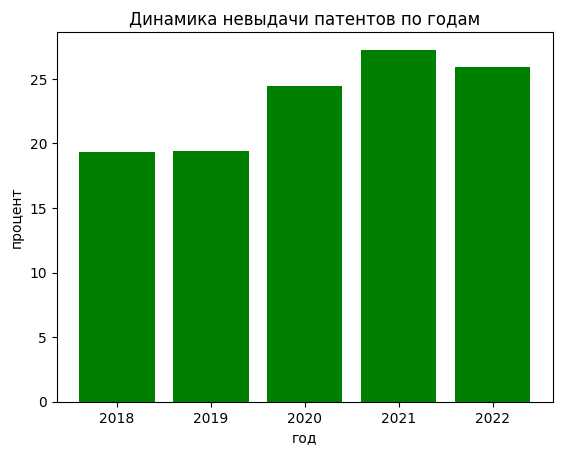

In [31]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['grant date'] == 'no_data'])/total)
  ipc_non_grant = (data_voc[year][data_voc[year]['grant date'] == 'no_data']['ipc'])
  ipc_non_grant.to_list()
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of non-granting applications by years')
plt.title('Динамика невыдачи патентов по годам')
plt.xlabel('year')
plt.xlabel('год')
plt.ylabel('persent')
plt.ylabel('процент')
plt.show()

1. Стенд контроля воздухораспределителей пассажирских вагонов; включающий размещенные в корпусе блоки управления и коммутации пневматической арматуры с датчиками контроля давления воздуха и соответствующими привалочными фланцами с пневмоприжимами; отличающийся тем; что дополнительно снабжен узлом изменения темпа давления; выполненного в виде дополнительного вентиля; стабилизатора давления и дросселя; а конструкция привалочного фланца и переключателей режимов выполнена пригодной для установки разных воздухораспределителей.
1. Средство индивидуальной защиты; состоящее из брюк с цельнокроеным поясом; отличающееся тем; что выполнено из однослойных материалов; верхняя часть брюк выполнена из материала высокой плотности свыше 350 мг/м3 и сострочена со вставкой в области шаговых швов; из материала малой плотности до 200 мг/м3; они соединены с верхними частями прямоугольной вставкой на передней части колена; из материала высокой плотности свыше 350 мг/м3; и прямоугольной вставкой области подко

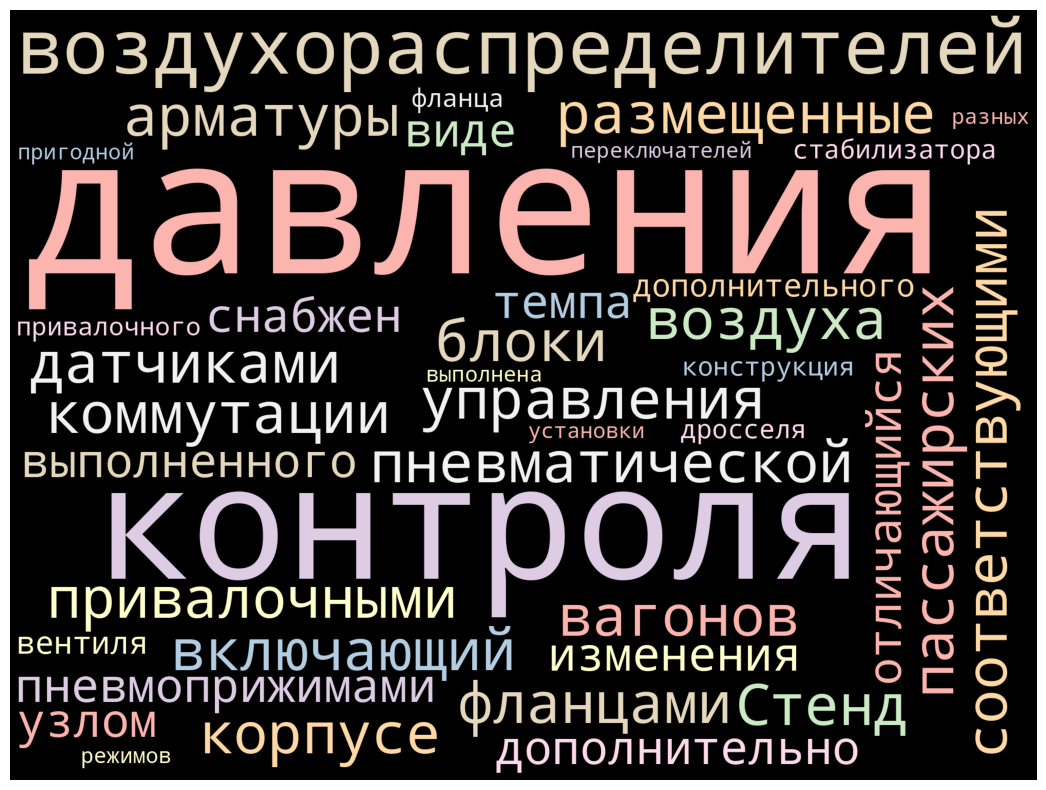

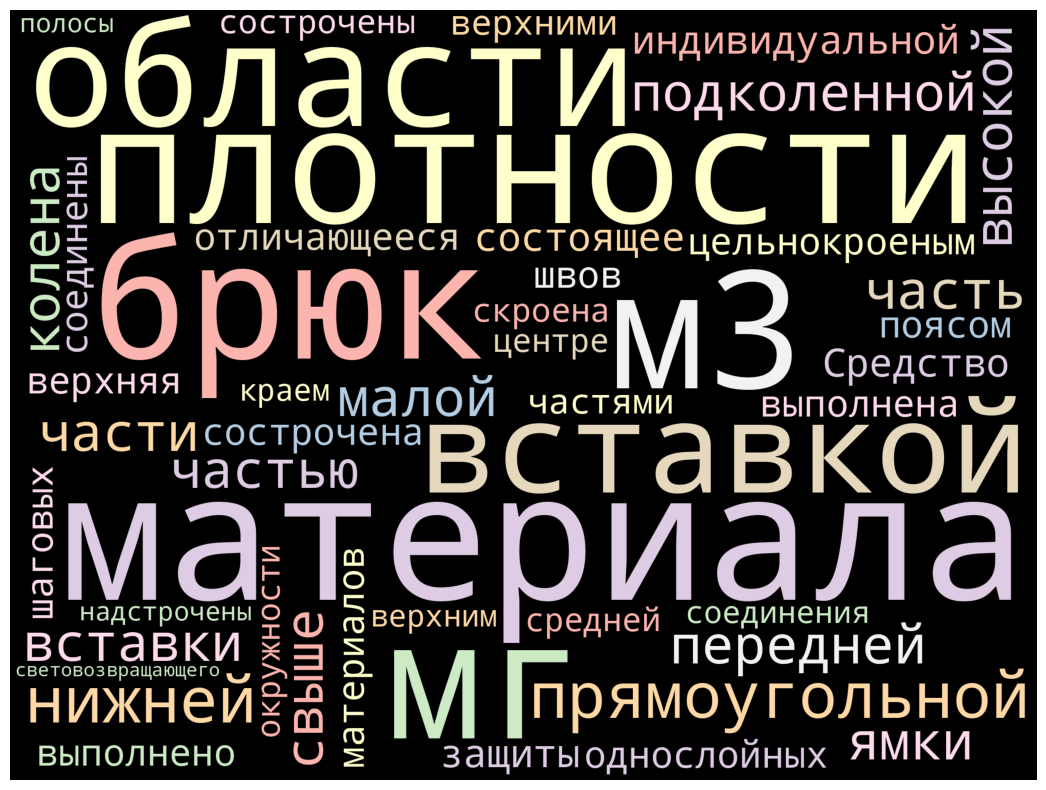

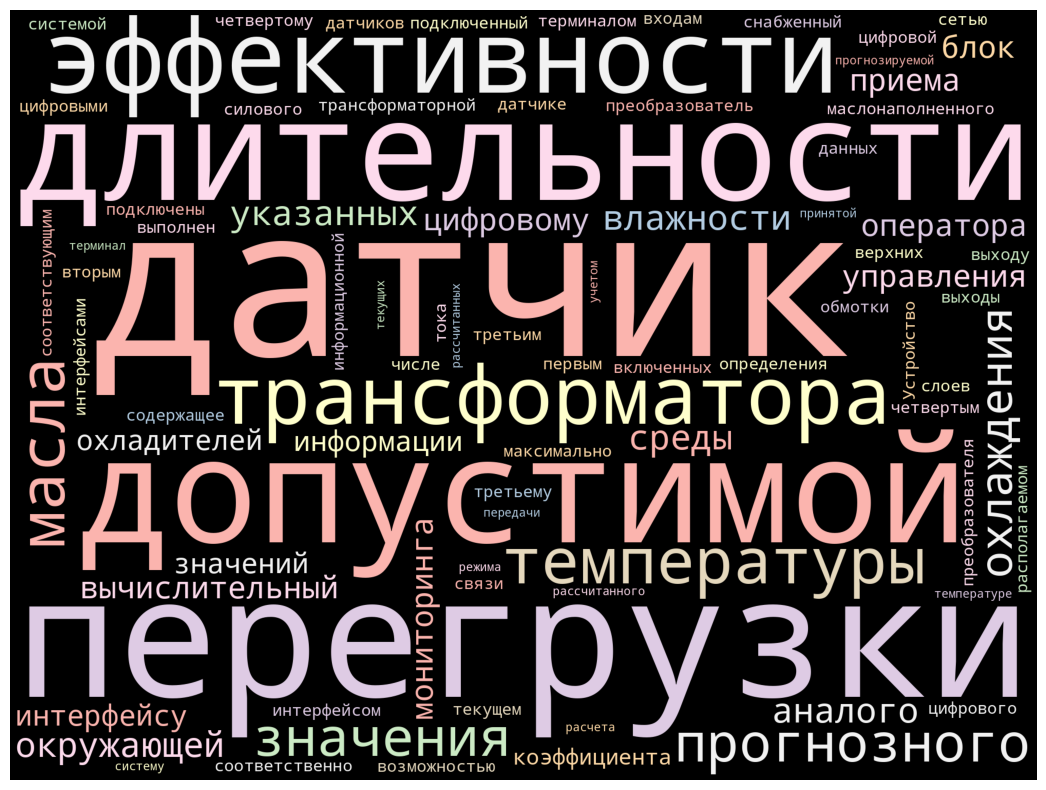

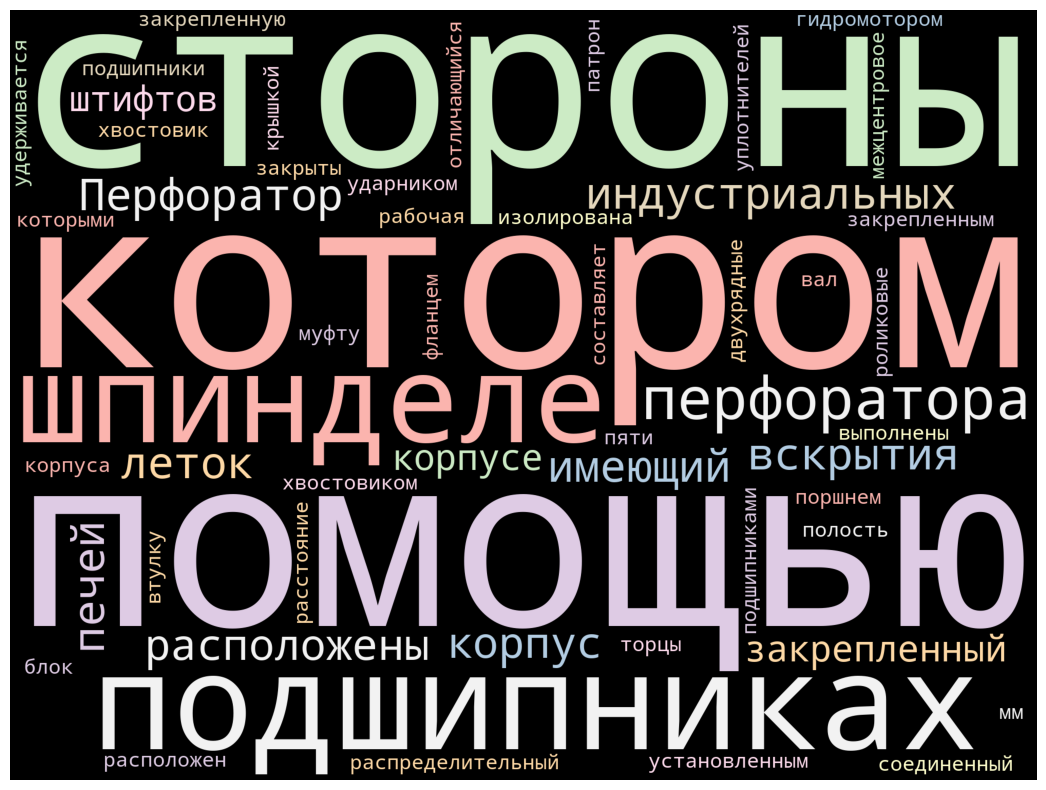

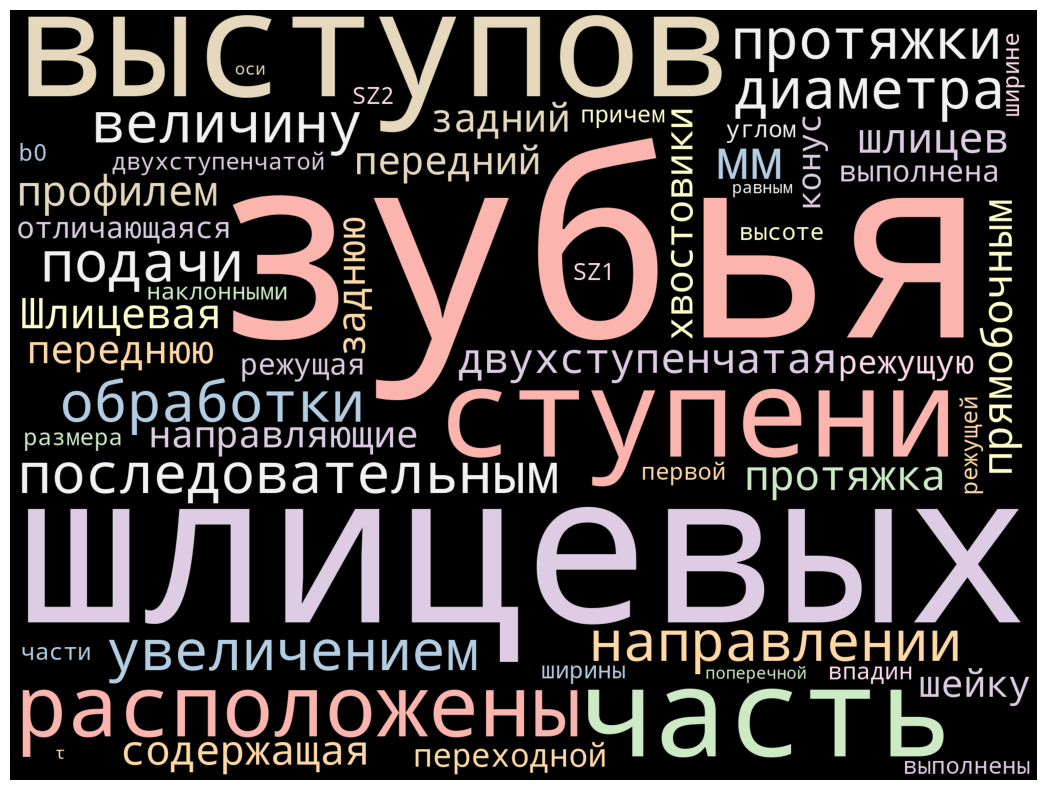

In [32]:
# облака слов названий по годам
for year in data_voc.keys():
  claims_data = (';'.join(data_voc[year].claims.str.split(',')[0]))
  STOPWORDS_RU = get_stop_words('russian')
  text = claims_data
  print(text)
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  plot_cloud(wordcloud)

<ipython-input-33-21ef70ef1efa>:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ipc_stat_df = ipc_stat_df.drop(index='n')


<Axes: title={'center': 'Динамика выдачи патентов по классам МПК \n(нормализовано к общему числу патентов)'}, xlabel='класс МПК', ylabel='процент'>

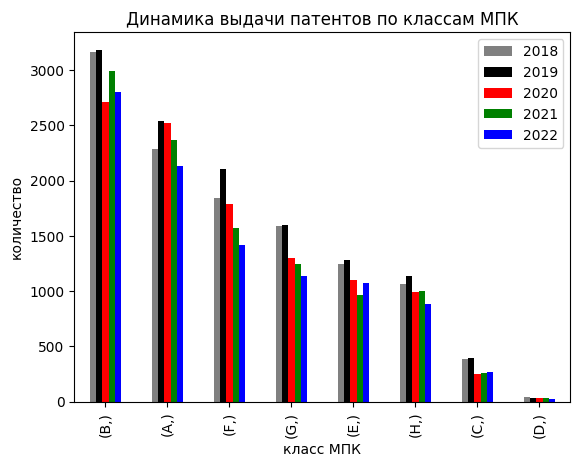

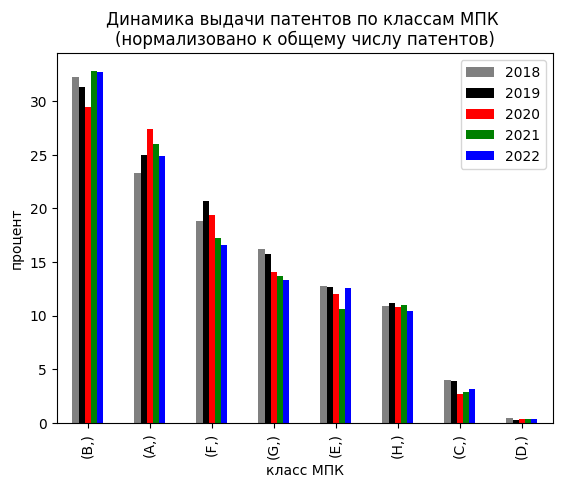

In [33]:
# выдача патентов по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  total = len(data_voc[year])/100
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][data_voc[year]['grant date'] != 'no_data']['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
ipc_stat_df = ipc_stat_df.drop(index='n')
ipc_stat_df.plot(kind='bar', color=['grey', 'black', 'red',  'green', 'blue'], xlabel='класс МПК', ylabel='количество', title='Динамика выдачи патентов по классам МПК')

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'], xlabel='класс МПК', ylabel='процент', title = 'Динамика выдачи патентов по классам МПК \n(нормализовано к общему числу патентов)')

Я не могу определить, по каким МПК отказы, так как нет данных по тем заявкам, по которым получен отказ, поэтому я могу посмотреть только по каким заявкам вдруг стали выдавать меньше патентов.

In [34]:
# количество запросов по годам (сколько было 0, 1, 2, 3, 4 запроса)
for year in years:
  print(year, data_voc[year]['substantive exam amount'].value_counts())

2018 0    6067
1    3272
2     445
3       3
Name: substantive exam amount, dtype: int64
2019 0    6646
1    3177
2     333
3       2
4       1
Name: substantive exam amount, dtype: int64
2020 0    5453
1    3373
2     379
3       3
Name: substantive exam amount, dtype: int64
2021 0    5100
1    3641
2     356
3       2
Name: substantive exam amount, dtype: int64
2022 0    4712
1    3557
2     269
Name: substantive exam amount, dtype: int64


   2018  2019  2020  2021  2022
B  1126  1068  1084  1278  1022
n  1013   944   954  1002  1072
A   988   943  1142  1239  1190
F   599   598   722   641   539
G   575   522   551   609   538
E   353   348   445   412   496
H   320   309   329   407   380
C   199   193   132   166   169
D    17     5    13    20    13


<ipython-input-35-7295d8107c94>:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ipc_stat_df = ipc_stat_df.drop(index='n')


<Axes: >

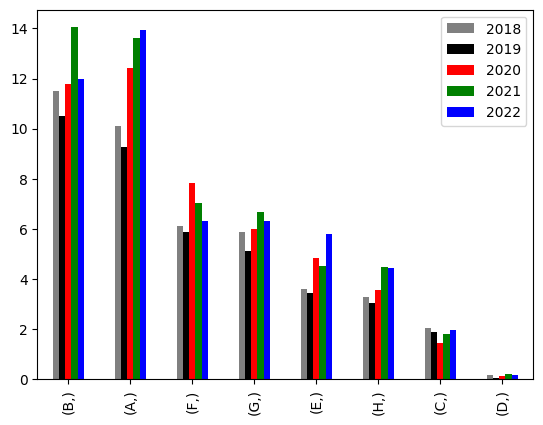

In [35]:
# факт запросов по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] != '0')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
ipc_stat_df = ipc_stat_df.drop(index='n')

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

   2018  2019  2020  2021  2022
B   997   966  1000  1187   977
A   946   891  1088  1138  1138
n   817   812   818   898   969
F   531   539   639   584   492
G   515   458   483   532   481
E   324   325   407   387   481
H   277   281   287   362   341
C   192   192   124   151   168
D    17     5    11    20    12


<ipython-input-36-aa2149bdd98d>:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ipc_stat_df = ipc_stat_df.drop(index='n')


<Axes: >

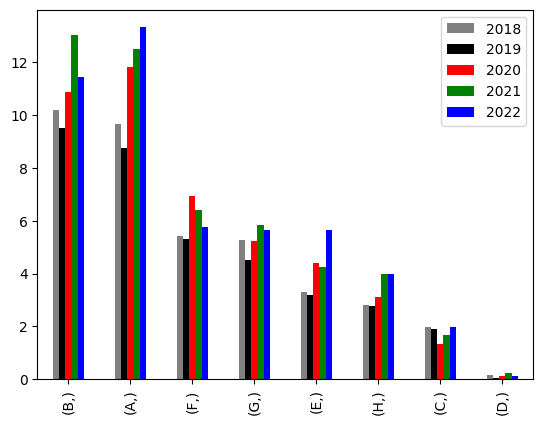

In [36]:
# 1 запрос по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] == '1')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
ipc_stat_df = ipc_stat_df.drop(index='n')

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

    2018   2019  2020   2021  2022
n  194.0  129.0   136  103.0   103
B  129.0  102.0    84   91.0    45
F   68.0   59.0    80   55.0    47
G   59.0   64.0    66   77.0    57
H   43.0   28.0    42   45.0    39
A   42.0   52.0    54  100.0    52
E   29.0   23.0    38   25.0    15
C    7.0    1.0     8   15.0     1
D    NaN    NaN     2    NaN     1


<ipython-input-37-b6f9ab8f6324>:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ipc_stat_df = ipc_stat_df.drop(index='n')


<Axes: >

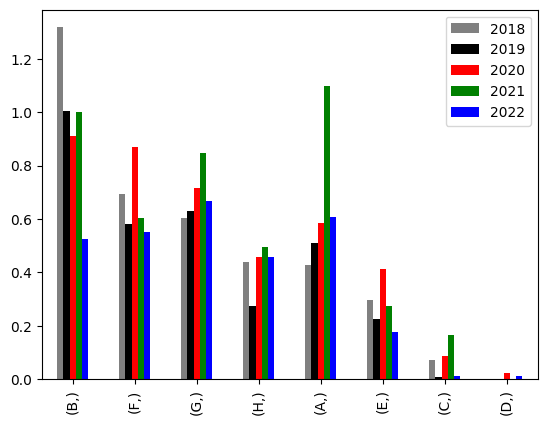

In [37]:
# 2 запроса по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] == '2')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
ipc_stat_df = ipc_stat_df.drop(index='n')

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

Виден какой-то огромный скачок в МПК А в 2021 году. При этом величина этого скачка в 0,5% от общего числа заявок, поэтому выявить причину достаточно тяжело

1. Магнитный соединительный элемент; Корпус-радиатор светодиодного светильника с отсеком для крепления светильника на опору; 1. Поршень дизельного двигателя внутреннего сгорания; 1. Поплавковая волновая электростанция; 1. Электрокаменка; Заряд для контурного взрывания; Двухступенчатое рабочее колесо центробежного насоса с двухсторонним входом; Рельс электромагнитного ускорителя масс с возможностью охлаждения; Накопитель энергии гидромеханический (НЭГМ); 1. Мобильный полевой тактический стол; Насос пропиточный; Криогенная энергетическая установка для охлаждения автомобильной камеры рефрижератора; 1. Руднотермическая электрическая печь; 1. Устройство для обезвоживания дизельного топлива; 1. Транспортная тара для упаковок с патронами; Устройство для расчистки русла реки с использованием кинетической энергии водного потока; Групповой цепной привод для скважин под штанговые насосы; 1. Функциональный шкаф с холодильной установкой; Кассета звукопоглощающая для глушителей шума газо-воздушных т

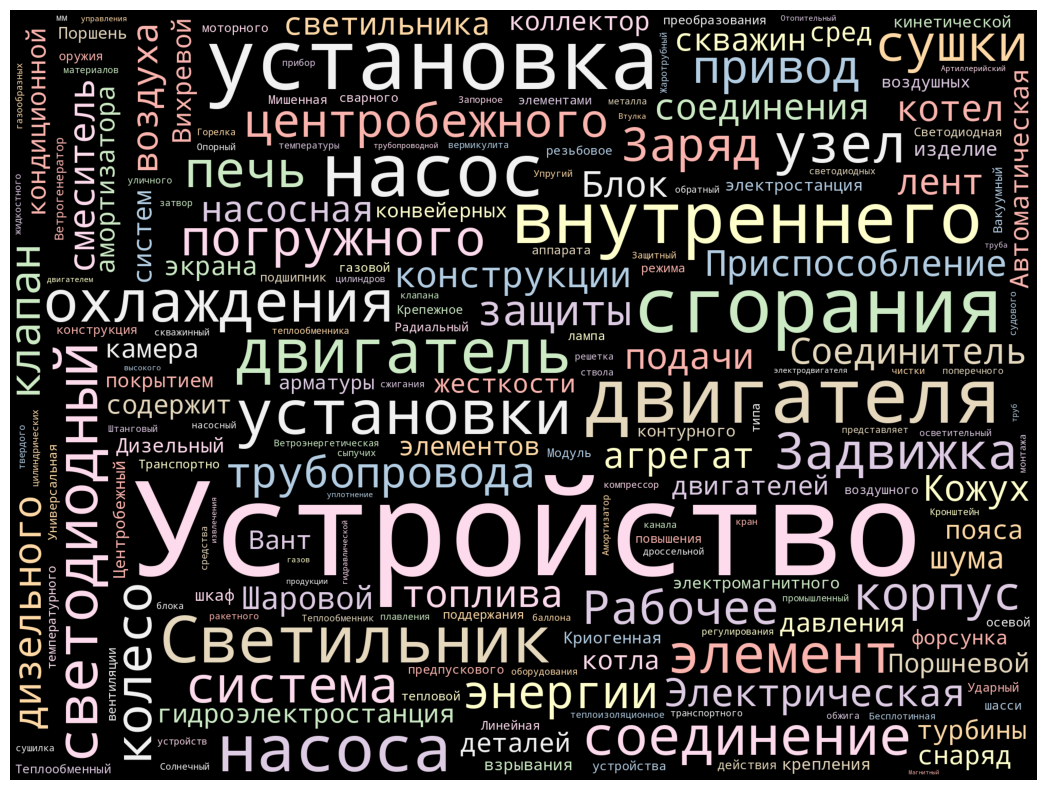

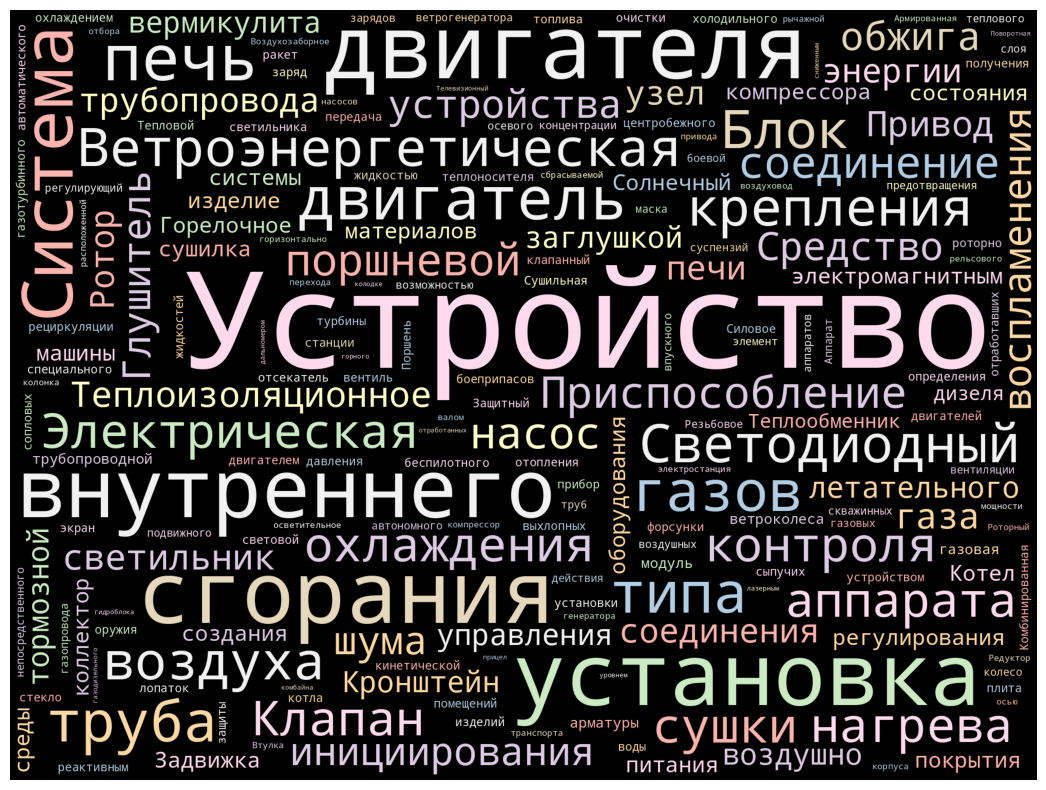

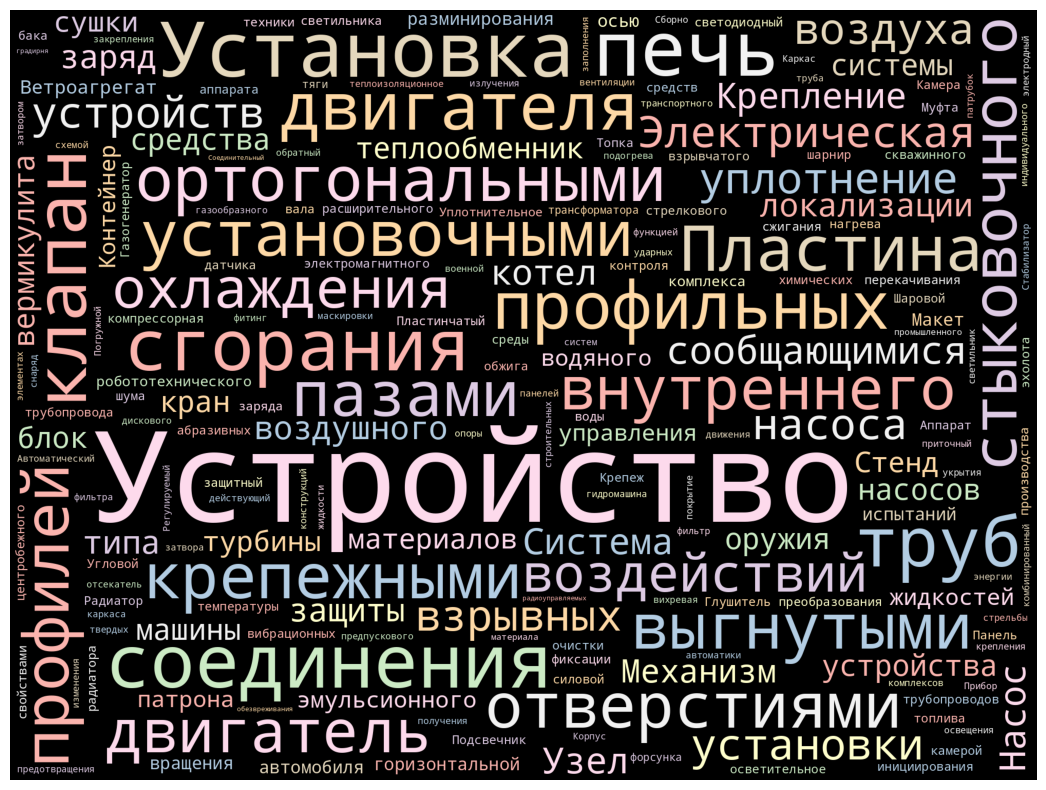

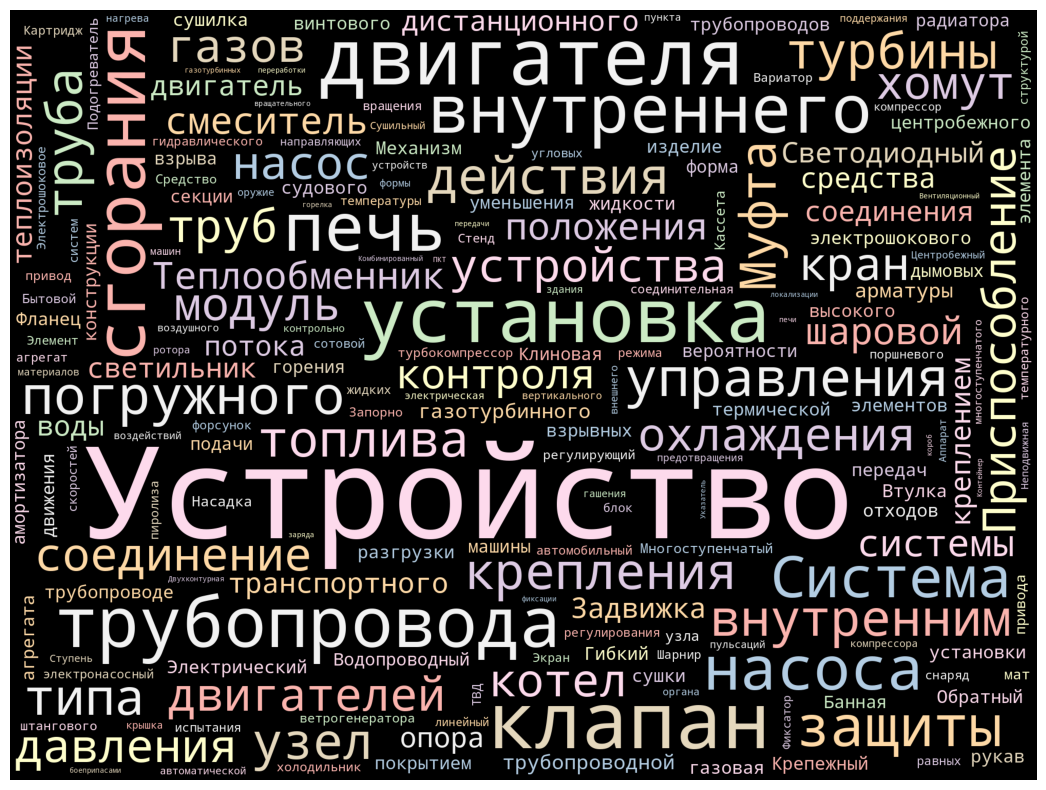

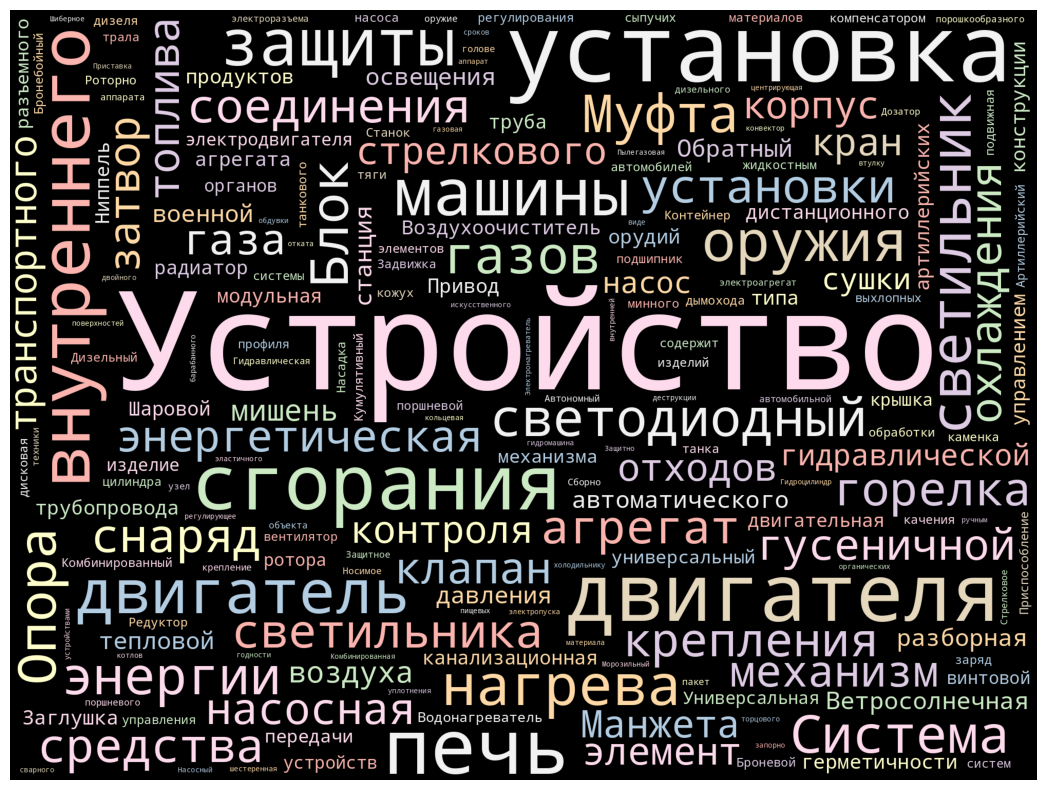

In [38]:
year_total = []
years = []

for year in data_voc.keys():
  hard_patents = ''
  data = (data_voc[year][(data_voc[year]['ipc'].str[0] == 'F') & (data_voc[year]['substantive exam amount'] == '1')]['claims'])
  #print(data.tolist())
  for i in data.tolist():

    hard_patents = hard_patents + i.split(',')[0] + '; '


  STOPWORDS_RU = get_stop_words('russian')
  text = hard_patents
  print(text)
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  plot_cloud(wordcloud)



Количество заявок без запросов по существу

[61.99039542249923, 65.41982478590413, 59.22024326672459, 56.05011539729641, 55.18856875146405]


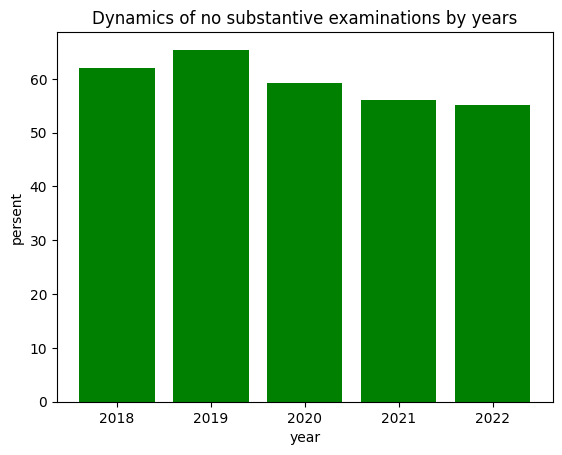

In [39]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len((data_voc[year][data_voc[year]['substantive exam amount'] == '0']))/total)
  ipc_non_grant = (data_voc[year][data_voc[year]['grant date'] == 'no_data']['ipc'])
  ipc_non_grant.to_list()
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of no substantive examinations by years')
plt.xlabel('year')
plt.ylabel('persent')
plt.show()

Количество заявок, по которым без запроса по существу выдают патент падает с 65 до 55%.

Посмотрим на количество запросов по существу

['2018', '2019', '2020', '2021', '2022']
      0 examinations  1 examination  2 examinations
2018       61.990395      33.432104        4.546848
2019       65.419825      31.272763        3.277882
2020       59.220243      36.631190        4.115986
2021       56.050115      40.015386        3.912518
2022       55.188569      41.660810        3.150621


<Axes: >

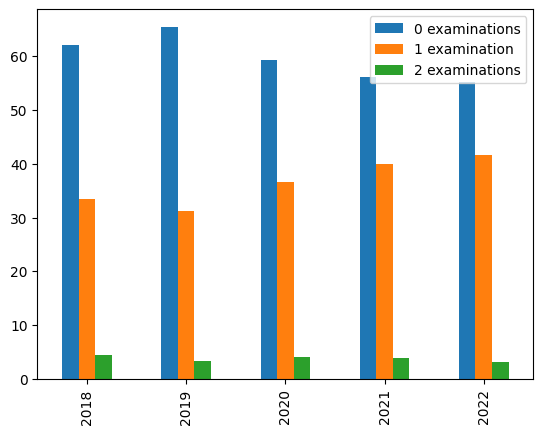

In [40]:
all_exams = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = (len(data_voc[year]))/100
  exams_0 = len(data_voc[year][data_voc[year]['substantive exam amount'] == '0'])
  exams_1 = len(data_voc[year][data_voc[year]['substantive exam amount'] == '1'])
  exams_2 = len(data_voc[year][data_voc[year]['substantive exam amount'] == '2'])

  #print(exams_0, exams_1, exams_2)

  all_exams.append([
          exams_0/total,
          exams_1/total,
          exams_2/total
        ])
print(years)
exams_df = pd.DataFrame(all_exams, columns=['0 examinations', '1 examination', '2 examinations'], index=years)
print(exams_df)
exams_df.plot(kind='bar')


Посмотрим на динамику отказов и на динамику отзывов

      refusal number  withdrawal number  no data number
2018        6.723204          12.996833        2.043527
2019        7.392460          11.684221        1.909637
2020        8.525195          15.291051        2.758471
2021        9.440598          14.968678        4.725794
2022        5.727337           9.358164       11.630358


<Axes: >

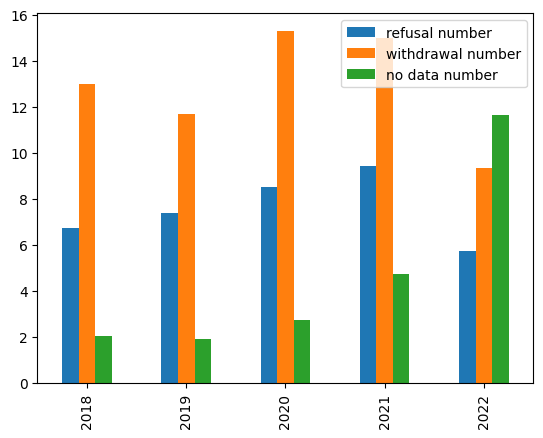

In [41]:
all_exams = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = (len(data_voc[year]))/100
  refuse = len(data_voc[year][data_voc[year]['refuse date'] != 'no_data'])
  withdrawn = len(data_voc[year][data_voc[year]['withdrawal date'] != 'no_data'])
  grant = len(data_voc[year][data_voc[year]['grant date'] != 'no_data'])
  rest = len(data_voc[year][(data_voc[year]['grant date'] == 'no_data') & (data_voc[year]['withdrawal date'] == 'no_data') & (data_voc[year]['refuse date'] == 'no_data')])
  rest2 =(data_voc[year][(data_voc[year]['grant date'] == 'no_data') & (data_voc[year]['withdrawal date'] == 'no_data') & (data_voc[year]['refuse date'] == 'no_data')])
  all_exams.append([
          refuse/total,
          withdrawn/total,
          rest/total
        ])

exams_df = pd.DataFrame(all_exams, columns=['refusal number', 'withdrawal number',  'no data number'], index=years)
print(exams_df)
exams_df.plot(kind='bar')

# 8. Кто чаще получает отказы в этих МПК (физики, юрики, госучреждения)

Это можно сделать только для ИЗ, для ПМ такие заявки не публикуются

# 9. Кто несмотря ни на что получает патенты в этих МПК